In [ ]:
import numpy as np

def heatmap_color(value, min_val, max_val):
    """ Returns a LaTeX color command based on the normalized value. """
    # Normalize the value between 0 and 1
    normalized = (value - min_val) / (max_val - min_val)

    # Clip the normalized value to be between 0 and 1
    normalized = max(0, min(1, normalized))

    # Calculate the weights for blue and red
    blue_weight = int((1 - normalized) * 100)  # Closer to red means less blue
    red_weight = int(normalized * 100)          # Closer to blue means less red

    # Return the LaTeX command for color
    return f'\\cellcolor{{blue!{blue_weight}!red!{red_weight}}}'

# Data for the table
data = [
    [0.15, -0.07, 0.23, 0.14, 0.10],
    [-0.09, 0.18, -0.05, 0.11, 0.04],
    [0.22, -0.12, 0.06, 0.09, 0.05],
    [0.13, -0.08, 0.17, -0.03, 0.04],
]

# Define min and max values for normalization
min_val = -0.09
max_val = 0.23

# Create LaTeX code with calculated values and colors
latex_output = []

# Adding the header
latex_output.append("\\begin{tabular}{!{\\vrule width 1.5pt}c!{\\vrule width 1pt}c|c|c|c|c||c!{\\vrule width 1.5pt}}")
latex_output.append("\\ChangeRT{1.5pt}")
latex_output.append("\\diagbox[width=9em]{\\bfseries Output}{\\bfseries FI(Input)} & \\bfseries FI(x_{0,1}) & \\bfseries FI(x_{0,2}) & \\bfseries FI(x_{0,3}) & \\cdots & \\bfseries FI(x_{0,M}) & FI Avg. \\\\")
latex_output.append("\\ChangeRT{1.5pt}")

# Adding data rows
for i, row in enumerate(data):
    latex_output.append(f"$x_{{0,{i+1}}}^1$ &")
    for value in row:
        color = heatmap_color(value, min_val, max_val)
        print(color)


\cellcolor{blue!25!red!75}
\cellcolor{blue!93!red!6}
\cellcolor{blue!0!red!100}
\cellcolor{blue!28!red!71}
\cellcolor{blue!40!red!59}
\cellcolor{blue!100!red!0}
\cellcolor{blue!15!red!84}
\cellcolor{blue!87!red!12}
\cellcolor{blue!37!red!62}
\cellcolor{blue!59!red!40}
\cellcolor{blue!3!red!96}
\cellcolor{blue!100!red!0}
\cellcolor{blue!53!red!46}
\cellcolor{blue!43!red!56}
\cellcolor{blue!56!red!43}
\cellcolor{blue!31!red!68}
\cellcolor{blue!96!red!3}
\cellcolor{blue!18!red!81}
\cellcolor{blue!81!red!18}
\cellcolor{blue!59!red!40}


In [ ]:
Xtrain[0:15]

tensor([[[ 0.9015],
         [-0.2730],
         [ 0.3223],
         [ 0.6030],
         [-0.0602],
         [-0.6853],
         [-0.3307],
         [-0.5228],
         [-0.2320],
         [ 0.5581],
         [ 0.1329],
         [-0.2653],
         [ 0.4795],
         [ 0.0813],
         [-0.4650],
         [ 0.5139],
         [-0.6818],
         [-0.3682],
         [-0.1471],
         [ 0.5029],
         [ 0.9737],
         [ 0.1632],
         [ 0.8019],
         [ 0.6439],
         [ 0.7287],
         [ 0.7035],
         [ 0.2410],
         [-0.0567],
         [-0.4528],
         [-0.2510],
         [ 0.9735],
         [ 0.3346],
         [ 0.9804],
         [ 0.5891],
         [ 0.2453],
         [ 0.6920],
         [ 0.2196],
         [ 0.0335],
         [-0.2809],
         [-0.8772],
         [ 0.3411],
         [ 0.1625],
         [-0.9641],
         [ 0.7996],
         [-0.0525],
         [ 0.3869],
         [-0.9301],
         [ 0.3901],
         [-0.2015],
         [ 0.9000],


In [ ]:
trainDat[0]

tensor([[[[-0.2565],
          [-0.4221],
          [-0.4892],
          ...,
          [-0.0818],
          [-0.3064],
          [-0.9250]]],


        [[[ 0.9015],
          [-0.2730],
          [ 0.3223],
          ...,
          [ 0.2714],
          [ 0.5476],
          [ 0.9372]]],


        [[[ 0.4619],
          [-0.0927],
          [-0.3828],
          ...,
          [ 0.3159],
          [ 0.3200],
          [ 0.5960]]],


        ...,


        [[[ 0.9401],
          [ 0.8978],
          [ 0.8435],
          ...,
          [ 0.3579],
          [ 0.9360],
          [-0.3294]]],


        [[[ 0.6638],
          [ 0.9315],
          [-0.8315],
          ...,
          [-0.9256],
          [-0.4155],
          [ 0.8560]]],


        [[[-0.5825],
          [ 0.6155],
          [-0.6154],
          ...,
          [-0.8389],
          [ 0.5367],
          [-0.5579]]]])

In [ ]:
import numpy as np
import pandas as pd
import torch
from torch.utils.data import DataLoader, TensorDataset

# Generate a synthetic dataset with 85 features and 22 time points
def generate_synthetic_dataset():
    # Generate a random dataset with shape (22, 85)
    np.random.seed(42)  # For reproducibility
    data = np.random.rand(84, 22)

    # Create a DataFrame to simulate reading from a CSV file
    df = pd.DataFrame(data)
    df.to_csv('gene.csv', index=False)
    return df

# Define the gene() function to read and process the data
def gene():
    # Read the generated CSV file
    X = pd.read_csv('gene.csv')
    print("Original shape:", X.shape)  # Expected (85, 22)

    # Transpose and convert to numpy array
    X = X.T
    X = np.array(X)
    print("Transposed shape:", X.shape)  # Expected (22, 85)

    # Scale the data
    xmin = np.min(X)
    xptp = np.ptp(X)
    X = 2 * (X - xmin) / xptp - 1
    print("Scaled shape:", X.shape)

    # Split into train and test sets
    X_train = X[0:15]  # First 15 columns as training data
    X_test = X[15:]   # Remaining columns as test data

    return X_train, X_test, 84, 1, xmin, xptp

# Generate the synthetic dataset
df = generate_synthetic_dataset()

# Load data
Xtrain, Xtest, m, n, xmin, xptp = gene()

# Reshape data for pytorch into 4D tensor Samples x Channels x Width x Height
def add_channels(X):
    if len(X.shape) == 2:
        return X.reshape(X.shape[0], 1, X.shape[1], 1)
    elif len(X.shape) == 3:
        return X.reshape(X.shape[0], 1, X.shape[1], X.shape[2])
    else:
        return "dimensional error"

Xtrain = add_channels(Xtrain)
Xtest = add_channels(Xtest)

print(Xtrain.shape)
print(Xtest.shape)

# Transfer to tensor
Xtrain = torch.from_numpy(Xtrain).float().contiguous()
Xtest = torch.from_numpy(Xtest).float().contiguous()

# Create Dataloader objects
args = type('', (), {})()  # Create an empty object to simulate args

trainDat = []
start = 0
for i in np.arange(args.steps, -1, -1):
    if i == 0:
        trainDat.append(Xtrain[start:].float())
    else:
        trainDat.append(Xtrain[start:-i].float())
    start += 1

# Check the varying lengths of trainDat
for idx, data in enumerate(trainDat):
    print(f"trainDat[{idx}] shape: {data.shape}")

# Combine into a dataset
train_data = TensorDataset(*trainDat)

# Create DataLoader
train_loader = DataLoader(dataset=train_data, batch_size=args.batch, shuffle=False)

# Check the content of the DataLoader
for batch_idx, data_list in enumerate(train_loader):
      print(f"----------------Batch data {batch_idx} shape: {len(data_list)}--------------")
      if batch_idx == 0:
          data = data_list

Original shape: (84, 22)
Transposed shape: (22, 84)
Scaled shape: (22, 84)
(15, 1, 84, 1)
(7, 1, 84, 1)
trainDat[0] shape: torch.Size([14, 1, 84, 1])
trainDat[1] shape: torch.Size([14, 1, 84, 1])
----------------Batch data 0 shape: 2--------------
----------------Batch data 1 shape: 2--------------
----------------Batch data 2 shape: 2--------------


In [ ]:
data[-1]

tensor([[[[ 0.9015],
          [-0.2730],
          [ 0.3223],
          [ 0.6030],
          [-0.0602],
          [-0.6853],
          [-0.3307],
          [-0.5228],
          [-0.2320],
          [ 0.5581],
          [ 0.1329],
          [-0.2653],
          [ 0.4795],
          [ 0.0813],
          [-0.4650],
          [ 0.5139],
          [-0.6818],
          [-0.3682],
          [-0.1471],
          [ 0.5029],
          [ 0.9737],
          [ 0.1632],
          [ 0.8019],
          [ 0.6439],
          [ 0.7287],
          [ 0.7035],
          [ 0.2410],
          [-0.0567],
          [-0.4528],
          [-0.2510],
          [ 0.9735],
          [ 0.3346],
          [ 0.9804],
          [ 0.5891],
          [ 0.2453],
          [ 0.6920],
          [ 0.2196],
          [ 0.0335],
          [-0.2809],
          [-0.8772],
          [ 0.3411],
          [ 0.1625],
          [-0.9641],
          [ 0.7996],
          [-0.0525],
          [ 0.3869],
          [-0.9301],
          [ 0

In [ ]:
data[0]

tensor([-0.8926])

In [ ]:
for batch_idx, data_list in enumerate(train_loader):
    print(data_list)

[tensor([[[[-0.2565],
          [-0.4221],
          [-0.4892],
          [-0.7261],
          [ 0.7739],
          [-0.4269],
          [-0.7684],
          [ 0.9717],
          [ 0.3794],
          [ 0.7736],
          [ 0.3124],
          [ 0.8295],
          [ 0.7541],
          [-0.0735],
          [ 0.5889],
          [-0.2938],
          [ 0.3146],
          [-0.8662],
          [ 0.7160],
          [ 0.3424],
          [-0.8388],
          [ 0.4901],
          [ 0.1651],
          [ 0.8215],
          [-0.8960],
          [ 0.0362],
          [-0.2123],
          [ 0.7931],
          [-0.8866],
          [-0.4682],
          [-0.2936],
          [-0.6658],
          [-0.8819],
          [-0.7284],
          [ 0.8126],
          [-0.7870],
          [ 0.0075],
          [ 0.7391],
          [ 0.8294],
          [ 0.1260],
          [-0.5449],
          [-0.6446],
          [-0.1547],
          [-0.7342],
          [ 0.1291],
          [ 0.5974],
          [ 0.8881],
          [-

In [ ]:
trainDat[0]

tensor([[[[-0.2565],
          [-0.4221],
          [-0.4892],
          [-0.7261],
          [ 0.7739],
          [-0.4269],
          [-0.7684],
          [ 0.9717],
          [ 0.3794],
          [ 0.7736],
          [ 0.3124],
          [ 0.8295],
          [ 0.7541],
          [-0.0735],
          [ 0.5889],
          [-0.2938],
          [ 0.3146],
          [-0.8662],
          [ 0.7160],
          [ 0.3424],
          [-0.8388],
          [ 0.4901],
          [ 0.1651],
          [ 0.8215],
          [-0.8960],
          [ 0.0362],
          [-0.2123],
          [ 0.7931],
          [-0.8866],
          [-0.4682],
          [-0.2936],
          [-0.6658],
          [-0.8819],
          [-0.7284],
          [ 0.8126],
          [-0.7870],
          [ 0.0075],
          [ 0.7391],
          [ 0.8294],
          [ 0.1260],
          [-0.5449],
          [-0.6446],
          [-0.1547],
          [-0.7342],
          [ 0.1291],
          [ 0.5974],
          [ 0.8881],
          [-0

In [ ]:
import numpy as np
import torch

# Set random seed for reproducibility
np.random.seed(0)
torch.manual_seed(0)

# Generate synthetic data with shape (64, 22)
num_samples = 64
num_features = 22
Xtrain = np.random.rand(num_samples, num_features)

# Convert to PyTorch tensor
Xtrain = torch.tensor(Xtrain, dtype=torch.float32)

# Define args for the sake of completeness
class Args:
    steps = 5  # Example value; can be adjusted as needed
    batch = 10  # Example batch size; can be adjusted as needed

args = Args()

# Prepare trainDat according to the provided code snippet
trainDat = []
start = 0
for i in np.arange(args.steps, -1, -1):
    if i == 0:
        trainDat.append(Xtrain[start:].float())
    else:
        trainDat.append(Xtrain[start:-i].float())
    start += 1

# Print the shapes of each tensor in trainDat
for idx, tensor in enumerate(trainDat):
    print(f"Shape of tensor {idx}: {tensor.shape}")

# Check if trainDat is working correctly
# The shapes should be as follows:
# - For each index i, the tensor shape should be (64 - start + i, 22), where start increases with each step

# Optional: Creating DataLoader for demonstration
from torch.utils.data import TensorDataset, DataLoader

# Since tensors in trainDat have varying lengths, we cannot directly use TensorDataset and DataLoader
# Let's concatenate tensors to create a single tensor for demonstration
# Note: This approach is only for demonstration; normally, DataLoader handles sequences with uniform lengths

# Concatenate all tensors into a single tensor for demonstration purposes
concatenated_tensor = torch.cat(trainDat, dim=0)

# Create a DataLoader
train_dataset = TensorDataset(concatenated_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=args.batch, shuffle=False)

# Example of iterating through the DataLoader
for batch in train_loader:
    print(batch[0])
    break  # Print only the first batch for demonstration


Shape of tensor 0: torch.Size([59, 22])
Shape of tensor 1: torch.Size([59, 22])
Shape of tensor 2: torch.Size([59, 22])
Shape of tensor 3: torch.Size([59, 22])
Shape of tensor 4: torch.Size([59, 22])
Shape of tensor 5: torch.Size([59, 22])
tensor([[0.5488, 0.7152, 0.6028, 0.5449, 0.4237, 0.6459, 0.4376, 0.8918, 0.9637,
         0.3834, 0.7917, 0.5289, 0.5680, 0.9256, 0.0710, 0.0871, 0.0202, 0.8326,
         0.7782, 0.8700, 0.9786, 0.7992],
        [0.4615, 0.7805, 0.1183, 0.6399, 0.1434, 0.9447, 0.5218, 0.4147, 0.2646,
         0.7742, 0.4562, 0.5684, 0.0188, 0.6176, 0.6121, 0.6169, 0.9437, 0.6818,
         0.3595, 0.4370, 0.6976, 0.0602],
        [0.6668, 0.6706, 0.2104, 0.1289, 0.3154, 0.3637, 0.5702, 0.4386, 0.9884,
         0.1020, 0.2089, 0.1613, 0.6531, 0.2533, 0.4663, 0.2444, 0.1590, 0.1104,
         0.6563, 0.1382, 0.1966, 0.3687],
        [0.8210, 0.0971, 0.8379, 0.0961, 0.9765, 0.4687, 0.9768, 0.6048, 0.7393,
         0.0392, 0.2828, 0.1202, 0.2961, 0.1187, 0.3180, 0.4143, 0.

In [ ]:
Xtrain

tensor([[0.5488, 0.7152, 0.6028,  ..., 0.8700, 0.9786, 0.7992],
        [0.4615, 0.7805, 0.1183,  ..., 0.4370, 0.6976, 0.0602],
        [0.6668, 0.6706, 0.2104,  ..., 0.1382, 0.1966, 0.3687],
        ...,
        [0.7032, 0.9493, 0.6941,  ..., 0.7672, 0.2872, 0.5483],
        [0.5434, 0.7396, 0.9569,  ..., 0.4445, 0.5024, 0.5400],
        [0.6455, 0.3449, 0.1011,  ..., 0.9122, 0.1183, 0.0252]])

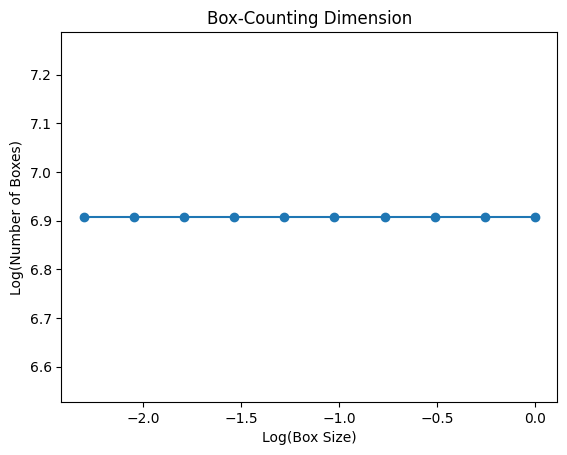

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def box_counting_dimension(data, box_sizes):
    dimensions = []
    for size in box_sizes:
        # Cover the space with boxes of given size
        counts = np.ceil((data.max(axis=0) - data.min(axis=0)) / size)
        total_boxes = np.prod(counts)
        if total_boxes == 0:
            continue
        # Count the number of boxes that contain at least one point
        num_boxes_with_points = np.sum(
            np.array([np.any((data >= i * size) & (data < (i + 1) * size), axis=1) for i in range(int(counts[0]))], dtype=bool),
            axis=0
        )
        dimensions.append((size, len(num_boxes_with_points[num_boxes_with_points > 0])))
    return dimensions

def plot_box_counting_dimension(dimensions):
    sizes, counts = zip(*dimensions)
    plt.plot(np.log(sizes), np.log(counts), marker='o')
    plt.xlabel('Log(Box Size)')
    plt.ylabel('Log(Number of Boxes)')
    plt.title('Box-Counting Dimension')
    plt.show()

# Example usage
data = np.random.rand(1000, 2)  # 2D random data
box_sizes = np.logspace(-1, 0, 10)
dimensions = box_counting_dimension(data, box_sizes)
plot_box_counting_dimension(dimensions)


In [ ]:
import numpy as np

def delay_embedding(time_series, delay, dimension):
    """
    Create a delay-embedded matrix from a time series.

    Parameters:
    - time_series: array-like, shape (T,)
    - delay: int, the delay parameter (how many time steps to look back)
    - dimension: int, the embedding dimension

    Returns:
    - embedded: array-like, shape (T - delay * (dimension - 1), dimension)
    """
    T = len(time_series)
    if T < delay * (dimension - 1):
        raise ValueError("Time series is too short for the given delay and dimension.")

    embedded = np.empty((T - delay * (dimension - 1), dimension))

    for i in range(dimension):
        embedded[:, i] = time_series[i * delay: i * delay + embedded.shape[0]]

    return embedded

# Example usage
time_series = np.sin(np.linspace(0, 10 * np.pi, 100))  # Example time series
delay = 1
dimension = 3
embedded_data = delay_embedding(time_series, delay, dimension)
time_series

array([ 0.00000000e+00,  3.12033446e-01,  5.92907929e-01,  8.14575952e-01,
        9.54902241e-01,  9.99874128e-01,  9.45000819e-01,  7.95761841e-01,
        5.67059864e-01,  2.81732557e-01, -3.17279335e-02, -3.42020143e-01,
       -6.18158986e-01, -8.32569855e-01, -9.63842159e-01, -9.98867339e-01,
       -9.34147860e-01, -7.76146464e-01, -5.40640817e-01, -2.51147987e-01,
        6.34239197e-02,  3.71662456e-01,  6.42787610e-01,  8.49725430e-01,
        9.71811568e-01,  9.96854776e-01,  9.22354294e-01,  7.55749574e-01,
        5.13677392e-01,  2.20310533e-01, -9.50560433e-02, -4.00930535e-01,
       -6.66769001e-01, -8.66025404e-01, -9.78802446e-01, -9.93838464e-01,
       -9.09631995e-01, -7.34591709e-01, -4.86196736e-01, -1.89251244e-01,
        1.26592454e-01,  4.29794912e-01,  6.90079011e-01,  8.81453363e-01,
        9.84807753e-01,  9.89821442e-01,  8.95993774e-01,  7.12694171e-01,
        4.58226522e-01,  1.58001396e-01, -1.58001396e-01, -4.58226522e-01,
       -7.12694171e-01, -

Delay Embedded Vectors:
[[0.0800745  0.04006943 0.        ]
 [0.11995096 0.0800745  0.04006943]
 [0.15963474 0.11995096 0.0800745 ]
 [0.19906213 0.15963474 0.11995096]
 [0.23816978 0.19906213 0.15963474]]


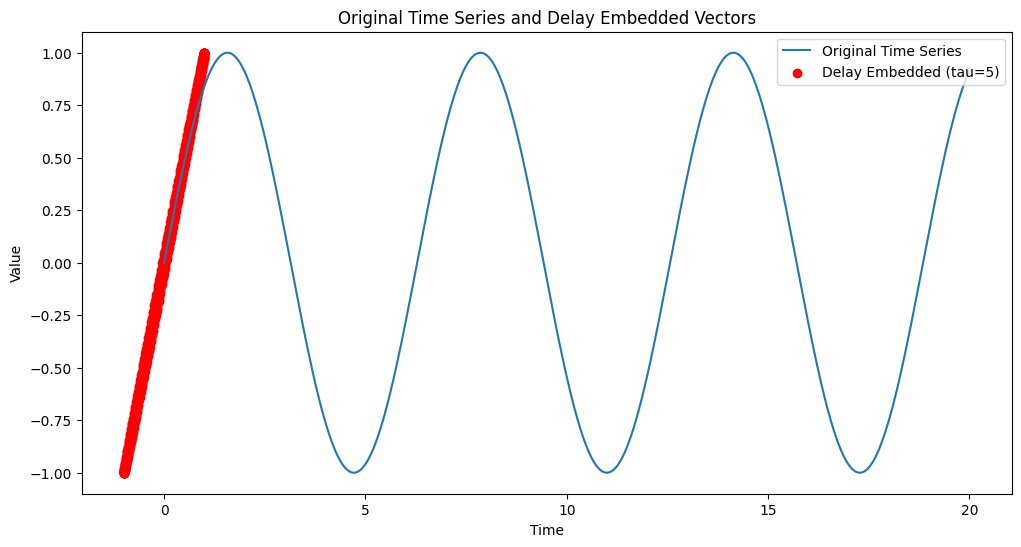

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate a simple time series (sine wave)
time_steps = np.linspace(0, 20, 500)
time_series = np.sin(time_steps)

# Parameters for delay embedding
tau = 1  # Time delay
m = 3    # Embedding dimension

# Create delay embedded vectors
# Create a DataFrame to easily handle the delay embedding
df = pd.DataFrame({'t': time_series})

# Shift the time series to create the delayed vectors
for i in range(1, m):
    df[f't-{i*tau}'] = df['t'].shift(i * tau)

# Drop rows with NaN values (which are due to shifting)
df = df.dropna().reset_index(drop=True)

# Convert to a numpy array for processing
embedded_data = df.values

# Print the delay embedded vectors
print("Delay Embedded Vectors:")
print(embedded_data[:5])  # Show the first 5 vectors

# Plot the original time series and the first two dimensions of the embedded data
plt.figure(figsize=(12, 6))
plt.plot(time_steps, time_series, label='Original Time Series')
plt.scatter(df['t'], df['t-1'], label='Delay Embedded (tau=5)', color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Original Time Series and Delay Embedded Vectors')
plt.show()


In [ ]:
df

t       t-1       t-2
0    0.080075  0.040069  0.000000
1    0.119951  0.080075  0.040069
2    0.159635  0.119951  0.080075
3    0.199062  0.159635  0.119951
4    0.238170  0.199062  0.159635
..        ...       ...       ...
493  0.836094  0.813441  0.789481
494  0.857404  0.836094  0.813441
495  0.877337  0.857404  0.836094
496  0.895860  0.877337  0.857404
497  0.912945  0.895860  0.877337

[498 rows x 3 columns]

# Report for “Applied Machine Learning for biological problems” project 1 - predicting water potability
Battisti Nicola, Efthymiadis Georgios, Predl Michael, Trinh Philipp (group 4)


# Loading packages:
---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Uploading water_quality.csv data file:
---

In [ ]:
import os
from google.colab import files
file_path = '/content/water_quality.csv'

# Check if the file exists
if not os.path.exists(file_path):
    print(f"The file {file_path} doesn't exist. Upload it below please...")
    uploaded = files.upload()
    datafile = list(uploaded.keys())[0]
    datafile
else:
    # Optional: Code to run if the file exists
    print(f"The file {file_path} already exists.")

The file /content/water_quality.csv already exists.


# Parse data file: (Run to reset df)
---
# **Protocol 1.) Use case understanding:** There are 3276 observations with 9 features and 1 target feature named 'Potability'. The target variable expressions are [0,1], with 1 being potable (safe for consumption) and 0 otherwise. The data types of all features are numerical values (decimal) greater than 0. With the trained model, one can predict the potability of various water source samples with the nine measurement features given ('ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity').

In [ ]:
import io
df_original = pd.read_csv(io.BytesIO(uploaded[f'{datafile}']))
df_original.info()
df = df_original.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df_original.head(5)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [ ]:
df_original['Potability'].unique()

array([0, 1])

# Set random_state = 12345
---

In [ ]:
random_state=12345

# Statistics of the data
---

## 1.) **Feature statistics:**
## **Protocol 2.) Data understanding - Descriptive statistics of features:** In the following code, target feature sizes of 1998 Non potable samples and 1278 potable ones were found. The descriptive statistics of the 9 features show no apparent differences in any parameter.

In [ ]:
target_col = 'Potability'
features = list(df_original.columns[df_original.columns != target_col])
features

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
features = list(df_original.columns[df_original.columns != 'Potability'])
features

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

In [ ]:
df_original['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [ ]:
df_potable = df_original[df_original[target_col] == 1]
df_non_potable = df_original[df_original[target_col] == 0]
print('Potable water data:')
df_potable.describe()

Potable water data:


ph     Hardness        Solids  Chloramines     Sulfate  \
count  1101.000000  1278.000000   1278.000000  1278.000000  985.000000   
mean      7.073783   195.800744  22383.991018     7.169338  332.566990   
std       1.448048    35.547041   9101.010208     1.702988   47.692818   
min       0.227499    47.432000    728.750830     0.352000  129.000000   
25%       6.179312   174.330531  15668.985035     6.094134  300.763772   
50%       7.036752   196.632907  21199.386614     7.215163  331.838167   
75%       7.933068   218.003420  27973.236446     8.199261  365.941346   
max      13.175402   323.124000  56488.672413    13.127000  481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  Potability  
count   1278.000000     1278.000000      1223.000000  1278.000000      1278.0  
mean     425.383800       14.160893        66.539684     3.968328         1.0  
std       82.048446        3.263907        16.327419     0.780842         0.0  
min      201.619737        2.200000         8.175876     1.492207         1.0  
25%      360.939023       12.033897        56.014249     3.430909         1.0  
50%      420.712729       14.162809        66.678214     3.958576         1.0  
75%      484.155911       16.356245        77.380975     4.509569         1.0  
max      695.369528       23.604298       124.000000     6.494249         1.0

In [ ]:
print('Non_Potable water data:')
df_non_potable.describe()

Non_Potable water data:


ph     Hardness        Solids  Chloramines      Sulfate  \
count  1684.000000  1998.000000   1998.000000  1998.000000  1510.000000   
mean      7.085378   196.733292  21777.490788     7.092175   334.564290   
std       1.683499    31.057540   8543.068788     1.501045    36.745549   
min       0.000000    98.452931    320.942611     1.683993   203.444521   
25%       6.037723   177.823265  15663.057382     6.155640   311.264006   
50%       7.035456   197.123423  20809.618280     7.090334   333.389426   
75%       8.155510   216.120687  27006.249009     8.066462   356.853897   
max      14.000000   304.235912  61227.196008    12.653362   460.107069   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  Potability  
count   1998.000000     1998.000000      1891.000000  1998.000000      1998.0  
mean     426.730454       14.364335        66.303555     3.965800         0.0  
std       80.047317        3.334554        16.079320     0.780282         0.0  
min      181.483754        4.371899         0.738000     1.450000         0.0  
25%      368.498530       12.101057        55.706530     3.444062         0.0  
50%      422.229331       14.293508        66.542198     3.948076         0.0  
75%      480.677198       16.649485        77.277704     4.496106         0.0  
max      753.342620       28.300000       120.030077     6.739000         0.0

## 2.) **Counts of NaN values:**
## **Protocol 2.) Data understanding - Number of missing values per feature:** In the following code, NaN values were found in 1265 observations (39%) inside the features 'pH' (491, 15%), in 'Sulfate' (781, 24%) and in 'Trihalomethanes' (162, 5%).

In [ ]:
# Count NaN values in each row and sum the result
nan_count = df_original.isnull().any(axis=1).sum()
print("Number of samples with NaN values: {}; {:.2f}%".format(nan_count, nan_count*100/3276))


Number of samples with NaN values: 1265; 38.61%


In [ ]:
nans = df_original.isna().sum()
percentage_nans = (nans / len(df_original)) * 100
percentage_nans = percentage_nans.round(2)

nan_info = pd.DataFrame({
    'Sum of NaNs': nans,
    'Percentage [%]': percentage_nans
})

nan_info

Sum of NaNs  Percentage [%]
ph                       491           14.99
Hardness                   0            0.00
Solids                     0            0.00
Chloramines                0            0.00
Sulfate                  781           23.84
Conductivity               0            0.00
Organic_carbon             0            0.00
Trihalomethanes          162            4.95
Turbidity                  0            0.00
Potability                 0            0.00

## 3.) **Duplicate detection**
## **Protocol 2.) Data understanding - Number of duplicate observations:** No duplicate observations were found.

In [ ]:
df_original.duplicated().sum()

0

## 4.) **Outlier counts:**
## **Protocol 2.) Data understanding - Outliers:** In the following code, outlier observations were found with +-1.5 x IQR (interquantile range). There are several observations in Hardness (83), Solids (47), Chloramines (61), Conductivity (11), Organic_carbon (25), Turbidity (19). They were not filtered out.

In [ ]:
# Outliers

def find_outliers(feature_values):
    Q1 = np.percentile(feature_values, 25)
    Q3 = np.percentile(feature_values, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (feature_values < lower_bound) | (feature_values > upper_bound)
    return outliers

for feature in features:
    outliers = find_outliers(df_original[feature])
    num_outliers = outliers.sum()
    print(f"Number of outliers in {feature}: {num_outliers}")

Number of outliers in ph: 0
Number of outliers in Hardness: 83
Number of outliers in Solids: 47
Number of outliers in Chloramines: 61
Number of outliers in Sulfate: 0
Number of outliers in Conductivity: 11
Number of outliers in Organic_carbon: 25
Number of outliers in Trihalomethanes: 0
Number of outliers in Turbidity: 19


## 5.) **Plots (pairplots, correlation, boxplots, distribution and KDE of the features):**

### Target variable distribution
### **Protocol 2.) Data understanding - Bar chart of the distribution of the target variable:** The following bar chart shows a higher number of non-potable observations (1998), compared to potable ones (1278). We have a medium imbalance in the target values.

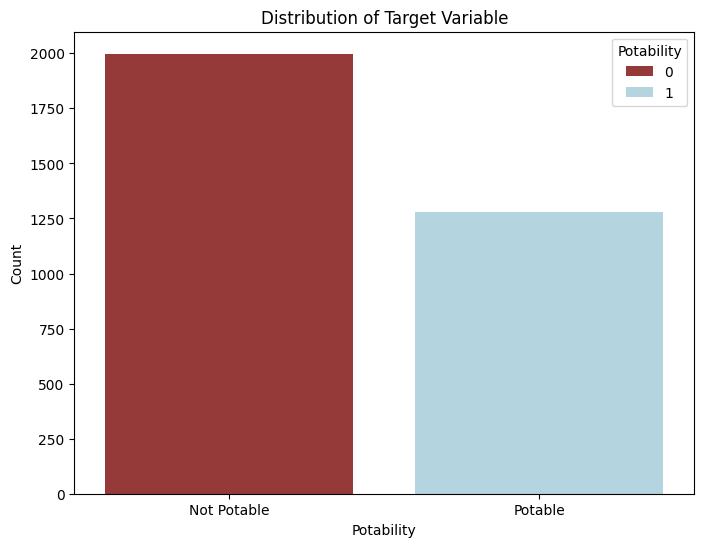

0    1998
1    1278
Name: Potability, dtype: int64


In [ ]:
# Assuming df is your DataFrame and 'Potability' is the target column
target_col = 'Potability'

plt.figure(figsize=(8, 6))
sns.countplot(data=df_original, x=target_col, hue=target_col, palette=['brown', 'lightblue'])
plt.title('Distribution of Target Variable')
plt.xlabel('Potability')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Potable', 'Potable'])
plt.show()
print(df_original['Potability'].value_counts())

### Correlation Matrix
### **Protocol 2.) Data understanding - Our understanding of the dataset:** The correlation matrix show very small correlation of the features to the target variable. The  most correlating features to the target variable are 'Solids' (0.034), 'Organic_carbon' (0.030), 'Chloramines' (0.024). However, there are low correlations between features: (Solids vs. Sulfate): 17%; (Hardness, Sulfate): 11%; (pH, Solids): 9%.

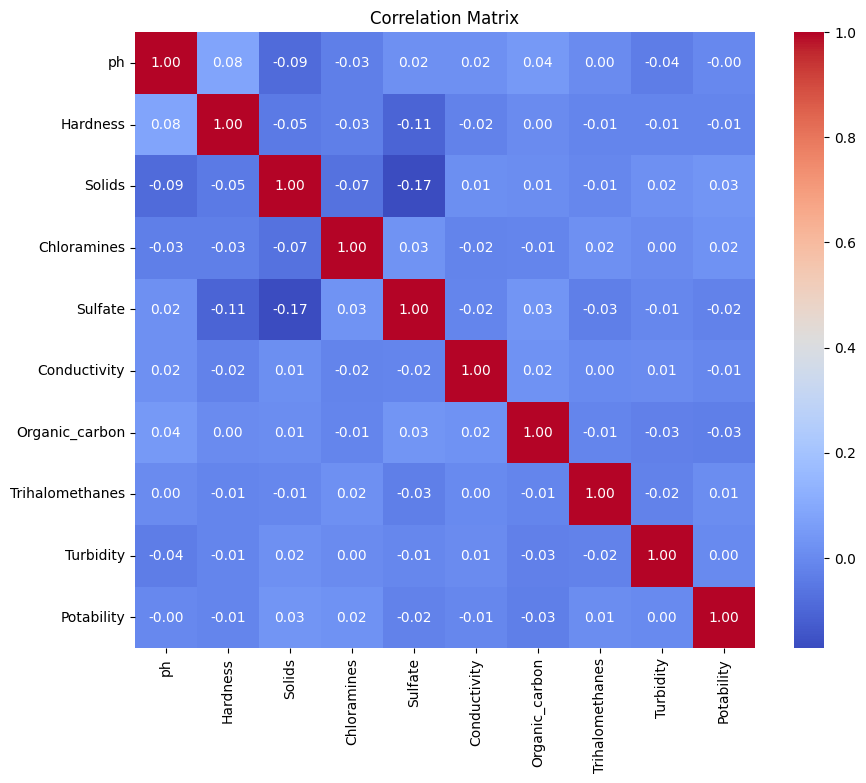

In [ ]:
# Correlation matrix:
correlation_matrix = df_original.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
correlation_matrix

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.082096 -0.089288    -0.034350  0.018203   
Hardness         0.082096  1.000000 -0.046899    -0.030054 -0.106923   
Solids          -0.089288 -0.046899  1.000000    -0.070148 -0.171804   
Chloramines     -0.034350 -0.030054 -0.070148     1.000000  0.027244   
Sulfate          0.018203 -0.106923 -0.171804     0.027244  1.000000   
Conductivity     0.018614 -0.023915  0.013831    -0.020486 -0.016121   
Organic_carbon   0.043503  0.003610  0.010242    -0.012653  0.030831   
Trihalomethanes  0.003354 -0.013013 -0.009143     0.017084 -0.030274   
Turbidity       -0.039057 -0.014449  0.019546     0.002363 -0.011187   
Potability      -0.003556 -0.013837  0.033743     0.023779 -0.023577   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.018614        0.043503         0.003354  -0.039057   
Hardness            -0.023915        0.003610        -0.013013  -0.014449   
Solids               0.013831        0.010242        -0.009143   0.019546   
Chloramines         -0.020486       -0.012653         0.017084   0.002363   
Sulfate             -0.016121        0.030831        -0.030274  -0.011187   
Conductivity         1.000000        0.020966         0.001285   0.005798   
Organic_carbon       0.020966        1.000000        -0.013274  -0.027308   
Trihalomethanes      0.001285       -0.013274         1.000000  -0.022145   
Turbidity            0.005798       -0.027308        -0.022145   1.000000   
Potability          -0.008128       -0.030001         0.007130   0.001581   

                 Potability  
ph                -0.003556  
Hardness          -0.013837  
Solids             0.033743  
Chloramines        0.023779  
Sulfate           -0.023577  
Conductivity      -0.008128  
Organic_carbon    -0.030001  
Trihalomethanes    0.007130  
Turbidity          0.001581  
Potability         1.000000

In [ ]:
correlation_dict = {}

# Iterate through all possible pairs
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
        value = correlation_matrix.iloc[i, j]
        correlation_dict[pair] = np.abs(value)

# Sort the dictionary by correlation values
sorted_correlation_dict = dict(sorted(correlation_dict.items(), key=lambda x: x[1], reverse=True))

# Get the top 3 and bottom 3 correlations
top_3_correlations = list(sorted_correlation_dict.items())[:8]
bottom_3_correlations = list(sorted_correlation_dict.items())[-3:][::-1]
# Print the results
print("Top 3 correlations:")
for pair, value in top_3_correlations:
    print(f"{pair}: {value}")

print("\nBottom 3 correlations:")
for pair, value in bottom_3_correlations:
    print(f"{pair}: {value}")

Top 3 correlations:
('Solids', 'Sulfate'): 0.17180427470199292
('Hardness', 'Sulfate'): 0.10692345399851362
('ph', 'Solids'): 0.08928825011982429
('ph', 'Hardness'): 0.08209640686603702
('Solids', 'Chloramines'): 0.07014757983260811
('Hardness', 'Solids'): 0.04689936548817769
('ph', 'Organic_carbon'): 0.04350334128238972
('ph', 'Turbidity'): 0.03905666613664019

Bottom 3 correlations:
('Conductivity', 'Trihalomethanes'): 0.0012852360715532888
('Turbidity', 'Potability'): 0.0015806819539225805
('Chloramines', 'Turbidity'): 0.0023633210684490037


In [ ]:
# Filter the dictionary for pairs involving 'Potability'
potability_correlations = {pair: value for pair, value in correlation_dict.items() if 'Potability' in pair}
sorted_potability = dict(sorted(potability_correlations.items(), key=lambda x: x[1], reverse=True))
# Display the correlations
for pair, value in sorted_potability.items():
    print(f"{pair}: {value}")

('Solids', 'Potability'): 0.03374331339365026
('Organic_carbon', 'Potability'): 0.030001366610944234
('Chloramines', 'Potability'): 0.02377897199467
('Sulfate', 'Potability'): 0.023577040191927266
('Hardness', 'Potability'): 0.013836558085111897
('Conductivity', 'Potability'): 0.008128319721545636
('Trihalomethanes', 'Potability'): 0.007130401120661979
('ph', 'Potability'): 0.0035564617651680386
('Turbidity', 'Potability'): 0.0015806819539225805


In [ ]:
# Map all measurement features to their correlation value to Potability
# and sort them ascending
feature_correlations = {feature: corr for (feature, _), corr in sorted_potability.items() if feature != 'Potability'}
ascending_feature_correlations = dict(sorted(feature_correlations.items(), key=lambda item: item[1]))
ascending_feature_correlations

{'Turbidity': 0.0015806819539225805,
 'ph': 0.0035564617651680386,
 'Trihalomethanes': 0.007130401120661979,
 'Conductivity': 0.008128319721545636,
 'Hardness': 0.013836558085111897,
 'Sulfate': 0.023577040191927266,
 'Chloramines': 0.02377897199467,
 'Organic_carbon': 0.030001366610944234,
 'Solids': 0.03374331339365026}

### Feature Distributions (Histograms)
### **Protocol 2.) Data understanding - Histogram plots of some "good" features w.r.t. target variable:** The following histograms show the distributions of all features in respect to the target variable. The most correlating features Solids (0.034), Organic_carbon (0.030), Chloramines (0.024) show some very slight visual differences in their distribution maximum and/or their standard deviation.

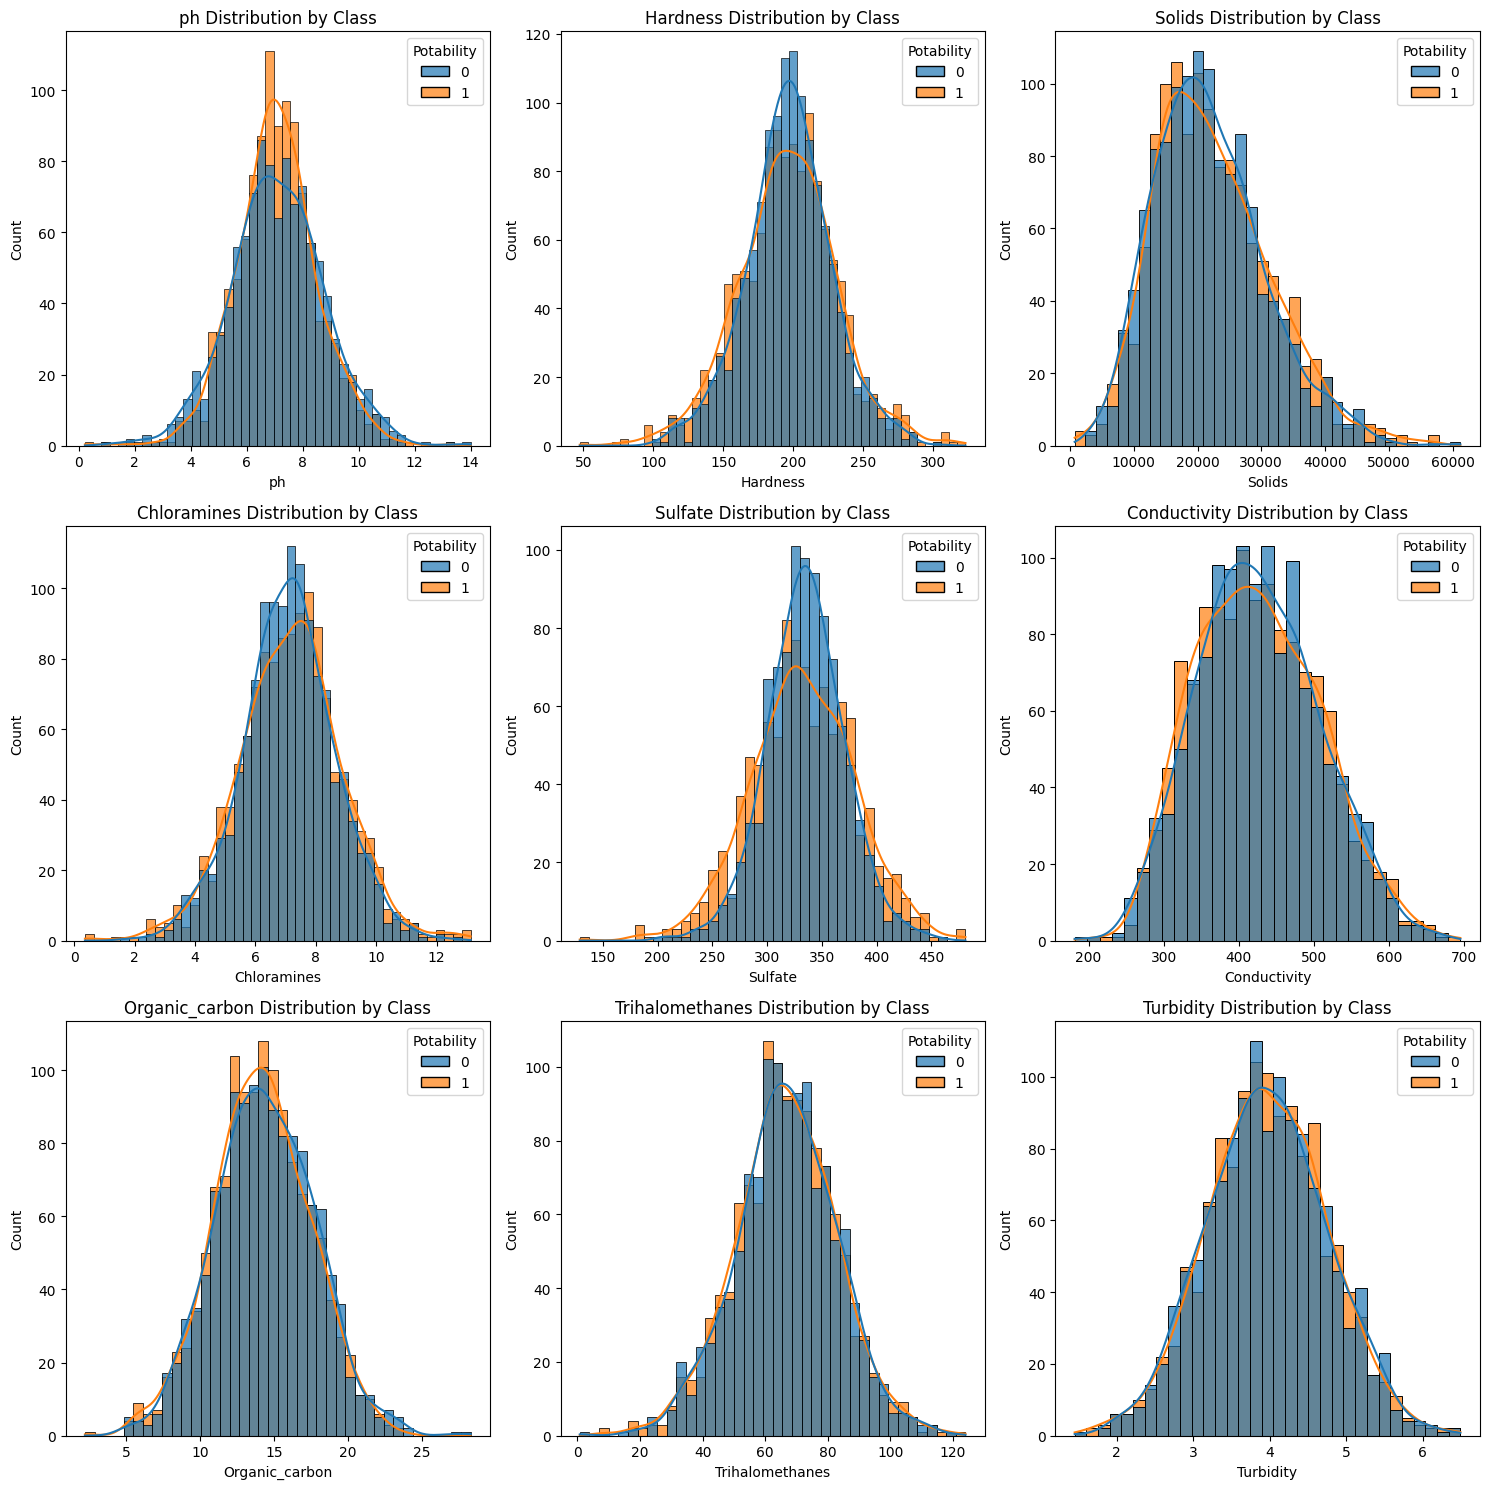

In [ ]:
# Assuming df is your DataFrame and 'Potability' is the target column
target_col = 'Potability'

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()

# Randomly select 1278 samples of potability 0
not_potable_samples = df_original[df_original[target_col] == 0].sample(n=1278)
potable_samples = df_original[df_original[target_col] == 1]
combined_df = pd.concat([not_potable_samples, potable_samples], ignore_index=True)

for i, col in enumerate(features):
    # Plot histogram for each feature by 'Potability'
    sns.histplot(data=combined_df, x=col, hue=target_col, kde=True, ax=axes[i], alpha=0.7)
    axes[i].set_title(f'{col} Distribution by Class')

plt.tight_layout()
plt.show()


### Pairplots
### **Protocol 2.) Data understanding - Our understanding of the dataset:** The pairplots show, that the distributions of Potable and Non-Potable observations in all possible feature pair combinations are very similar. The only notable feature pairplots showing different distributions between the target variables are: (pH, Sulfate), (Hardness, Chloramines), (Sulfate, Hardness), (Sulfate, Solids), (Sulfate, Chloramines).

<Figure size 1200x600 with 0 Axes>

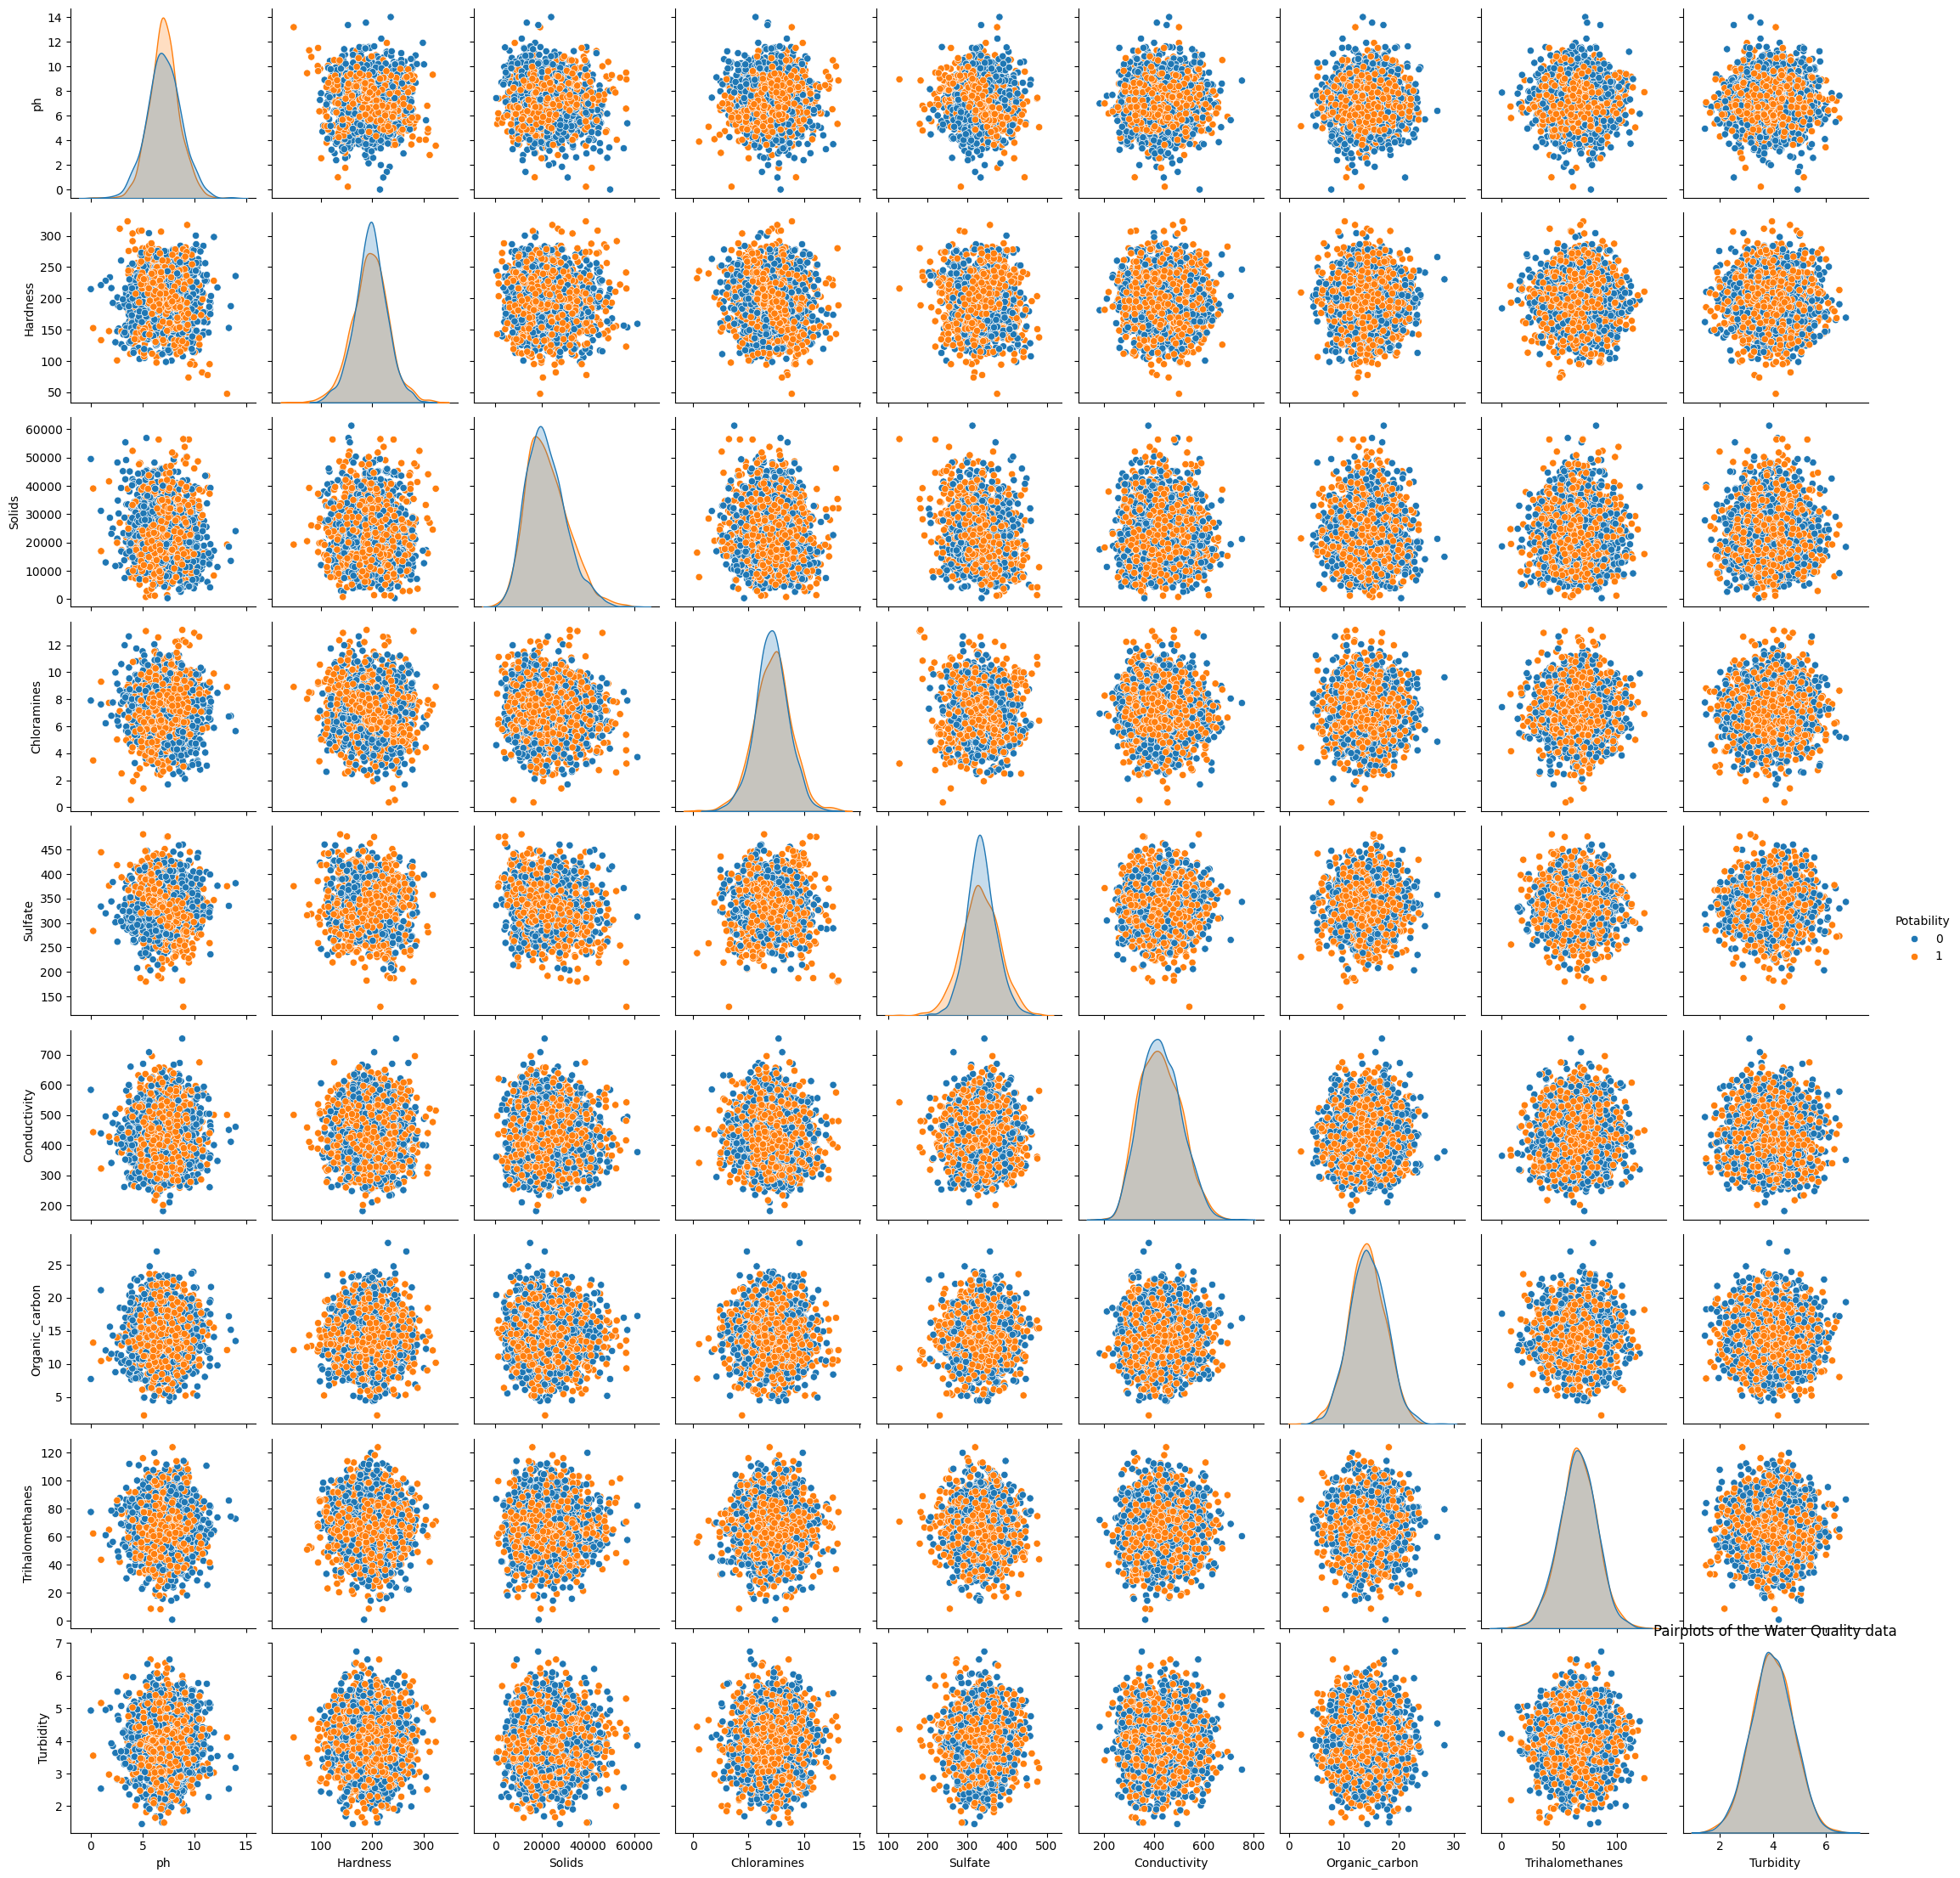

In [ ]:
plt.figure(figsize=(12, 6))
sns.pairplot(data=df_original, hue='Potability', diag_kws=dict(common_norm=False))
plt.title('Pairplots of the Water Quality data')
plt.show()

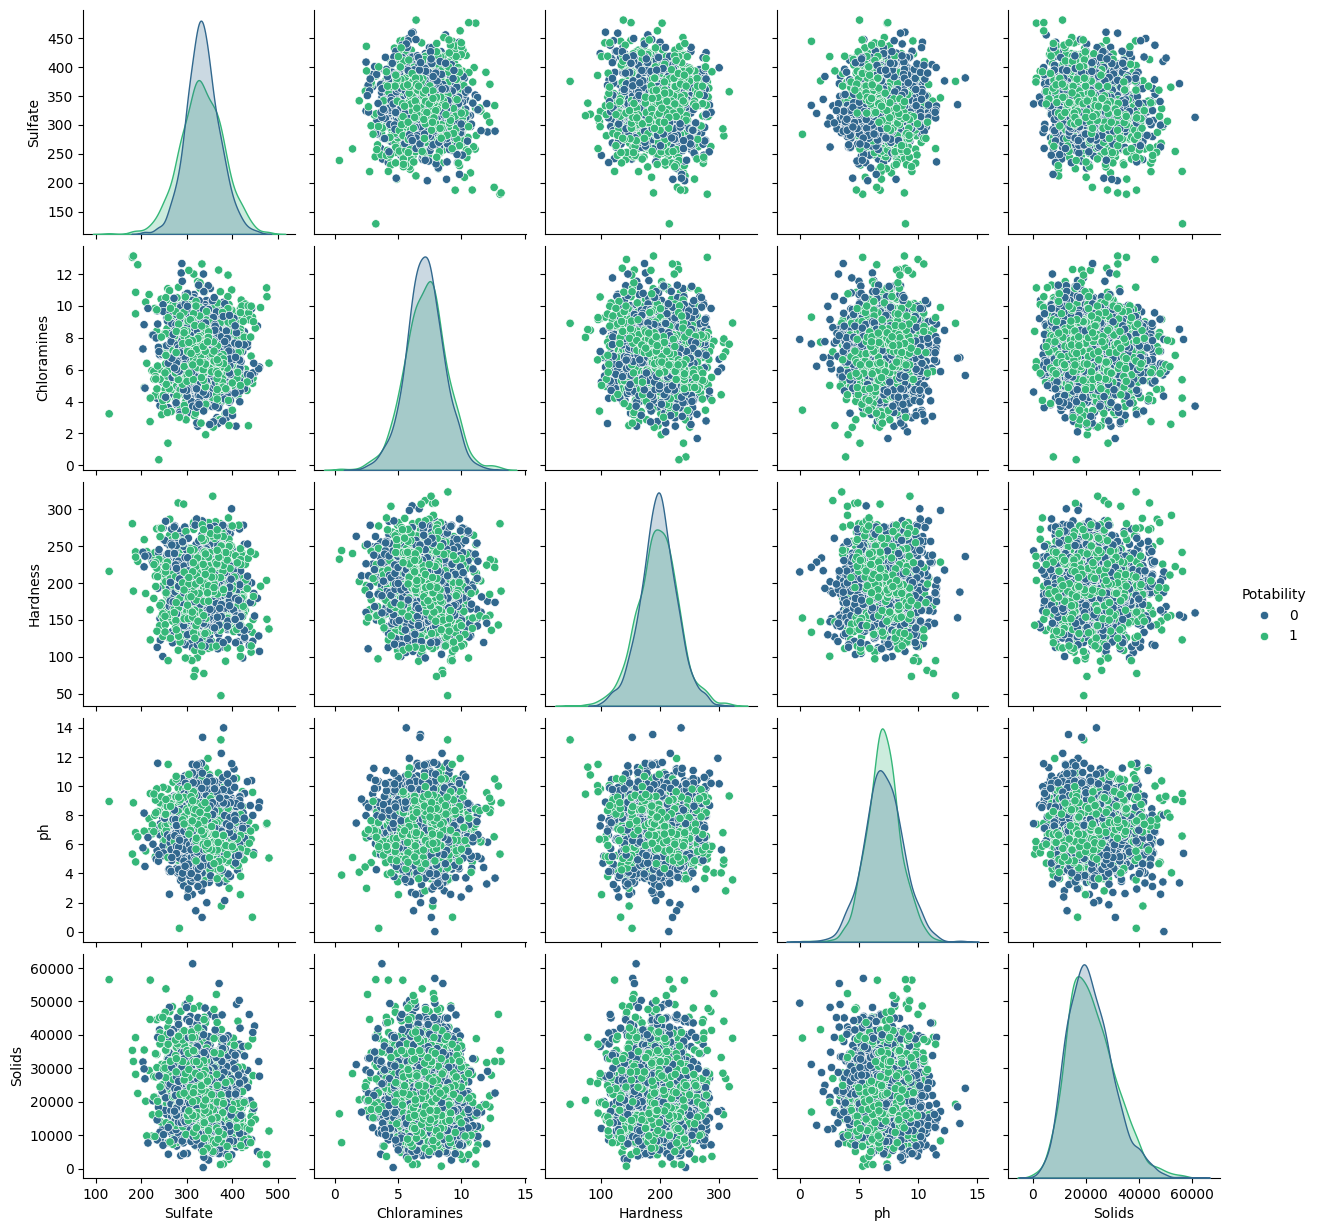

In [ ]:
# Assuming df is your DataFrame and 'Potability' is the target column
target_col = 'Potability'

plot_features = ['Sulfate', 'Chloramines', 'Hardness', 'ph', 'Solids']

# Create a DataFrame with the selected features and the target
selected_data = df_original[plot_features].copy()
selected_data[target_col] = df_original[target_col]

# Create a pair plot
sns.pairplot(selected_data, hue=target_col, palette='viridis', diag_kws=dict(common_norm=False))
plt.show()

### Boxplots
### **Protocol 2.) Data understanding - Our understanding of the dataset:** The boxplots show, that the distributions of Potable and Non-Potable observations in all 8 features are similar. There are notably many visual outliers in the features (pH, Hardness, Solids, Chloramines, Sulfate).

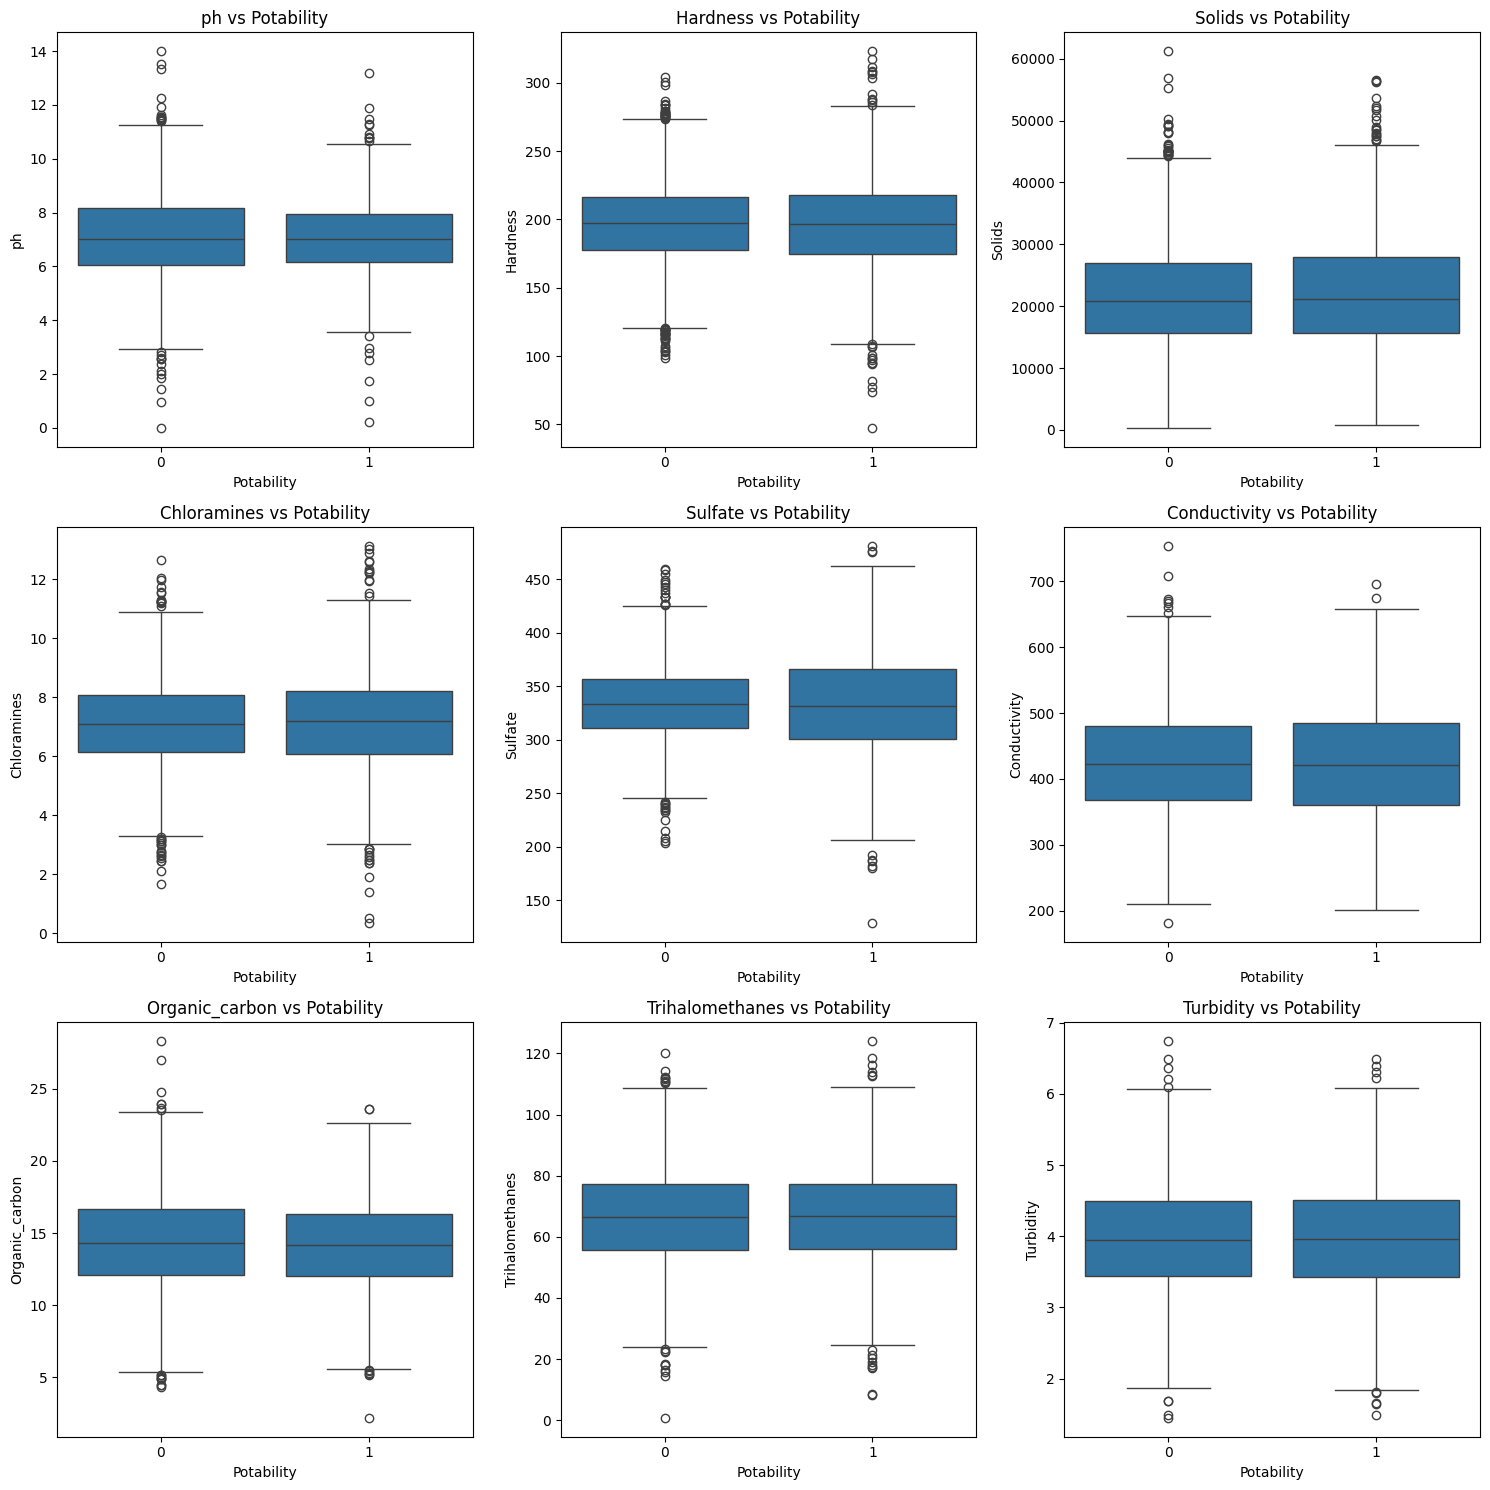

In [ ]:
# Boxplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.boxplot(x='Potability', y=col, data=df_original, ax=axes[i])
    axes[i].set_title(f'{col} vs Potability')

plt.tight_layout()

plt.show()

### KDE plots
### **Protocol 2.) Data understanding - Our understanding of the dataset:** The KDE plots show, the distributions of the features in respect to their target variable and the differences in their distributions. Apart from the imbalance of the target variable, shown in the difference between the modi of their distribution. There are slight differences in the distribution between the features: pH, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon.

In [ ]:
df_original['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

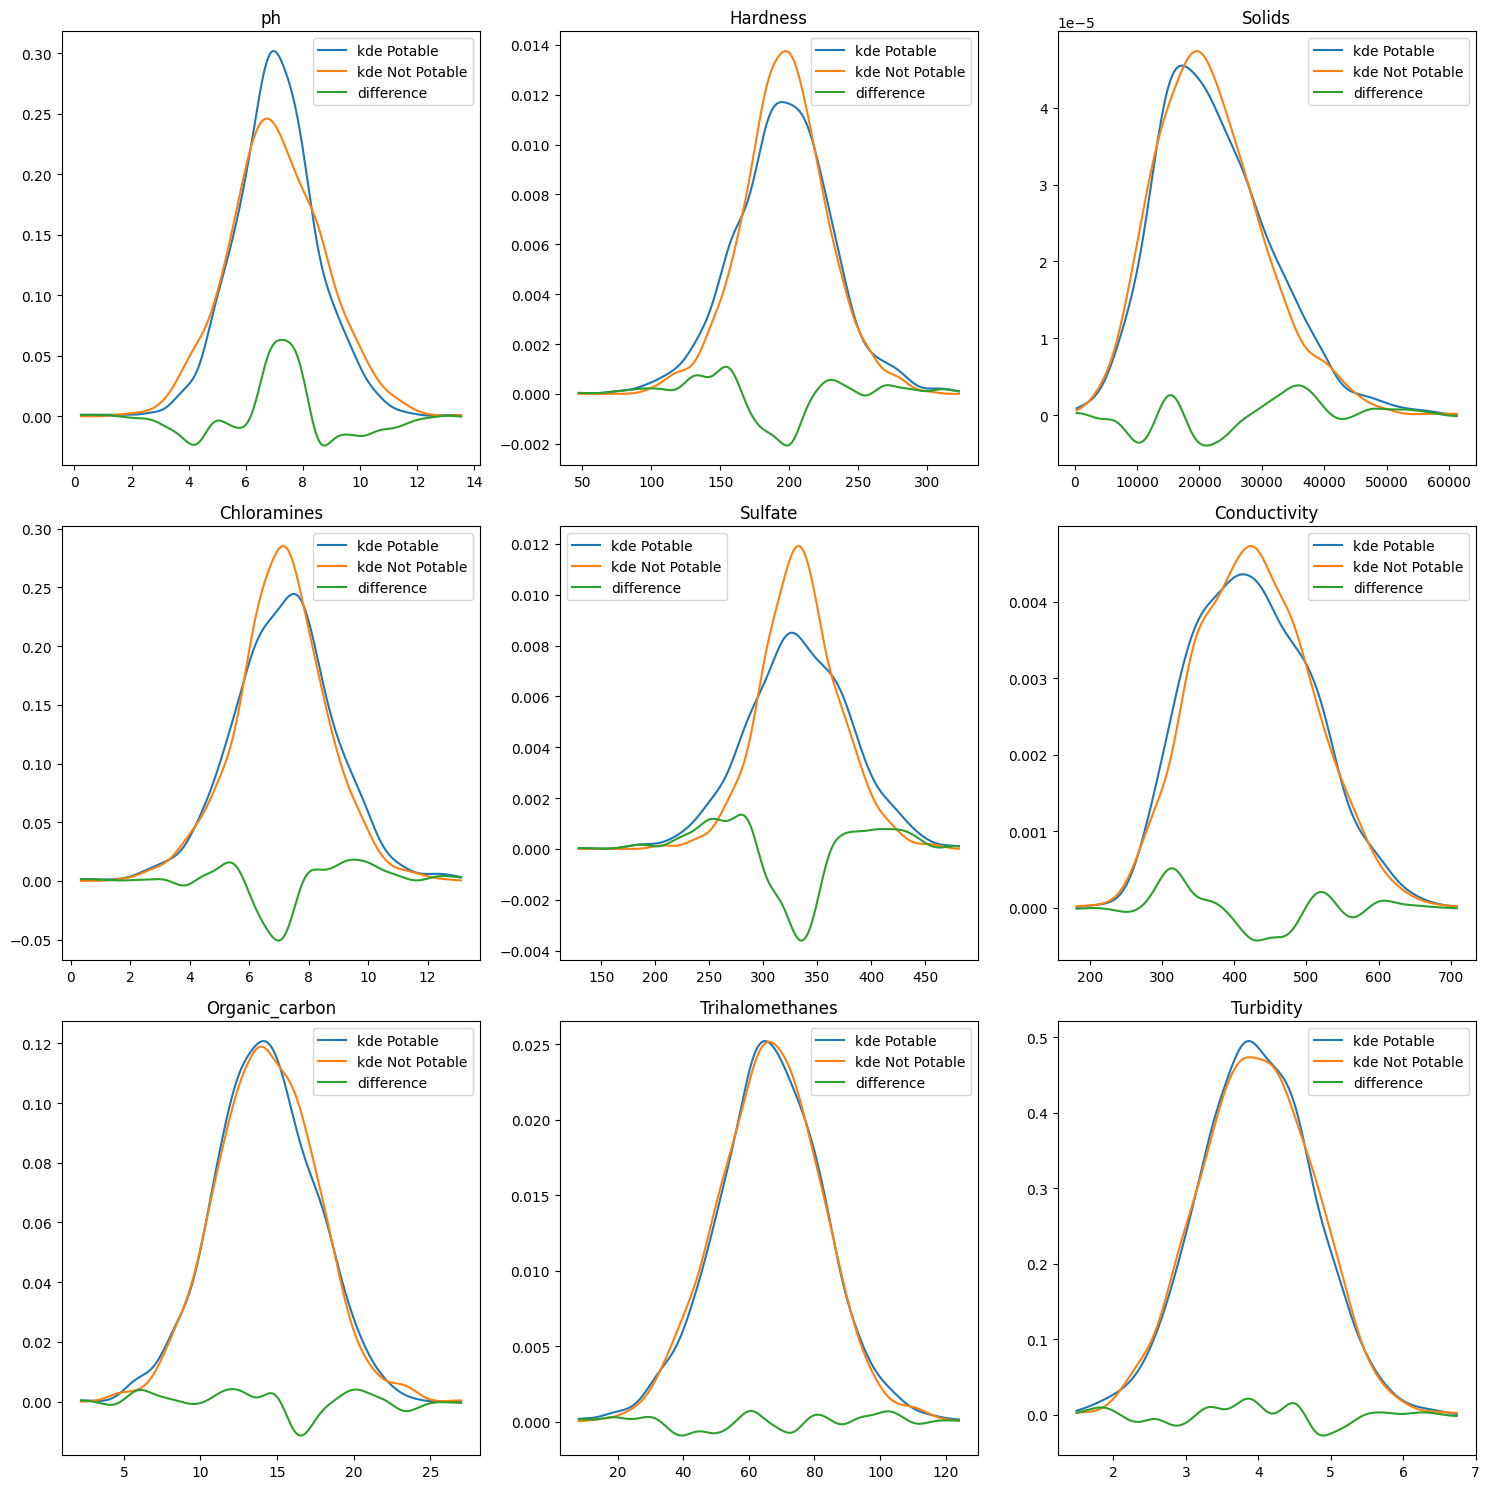

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats


# Assuming df is your DataFrame and 'Potability' is the target column
target_col = 'Potability'

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Flatten the axes to iterate through them easily
axes = axes.flatten()

# Randomly select 1278 samples of potability 0
not_potable_samples = df_original[df_original[target_col] == 0].sample(n=1278, random_state=42)

for i, col in enumerate(features):
    # Calculate KDE for Potable and Not Potable
    potable = df_original[df_original[target_col] == 1][col].dropna()
    not_potable = not_potable_samples[col].dropna()

    kde_pot = scipy.stats.gaussian_kde(potable)
    kde_not_pot = scipy.stats.gaussian_kde(not_potable)

    grid = np.linspace(min(min(potable), min(not_potable)), max(max(potable), max(not_potable)), 501)

    # Plot on the current subplot
    axes[i].plot(grid, kde_pot(grid), label="kde Potable")
    axes[i].plot(grid, kde_not_pot(grid), label="kde Not Potable")
    axes[i].plot(grid, kde_pot(grid) - kde_not_pot(grid), label="difference")
    axes[i].set_title(col)

    axes[i].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### **Protocol 2.) Data understanding - Our understanding of the dataset:**
##The distributions of the features in respect to the target variable are very similar, which may lead to a low target label prediction accuracy as they are hardly distinguishable.  
## The imbalance of the target variable is medium and may be corrected by undersampling or oversampling. Naive Bayes is not sensitive to class imbalance, but it may help kNN model training.
## We would also drop non-correlating features like 'Trihalomethanes' (0.0071) and 'Turbidity' (0.0016). We decided not to drop 'pH' (0.0036), as it contains correlation to other features (shown in correlation matrix) and slight differences in class respective distribution (shown in kde plot).
## This is not the case for 'Trihalomethanes' and 'Turbidity'. Evaluation has also shown that dropping only these two increase accuracy more than dropping all 3 lowest correlating features.
## The pairplot shows that the target variable distribution is distuingishable for the features 'Sulfate', 'Chloramines', 'Hardness', 'ph' and 'Solids'. Therefore, we also decided to drop 'Organic_carbon' and 'Conductivity'. This also increased average prediction accuracy in the evaluation.

# data corrections:
---

## Reset dataframe:
## Two dataframes are created:
## 1.) df for training the optimized models:
## (will contain corrections)
## 2.) df_baseline dor training the baseline models:
## (no corrections, except NaN value observation dropping)

In [ ]:
df_original = pd.read_csv(io.BytesIO(uploaded[f'{datafile}']))
df_baseline = df_original.copy()
df = df_original.copy()
features = list(df.columns[df.columns != 'Potability'])
features

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## 1.) Dropping Features
## **Protocol 3.) Data Preparation - dropping features:** We dropped the features 'Trihalomethanes' and 'Turbidity' as they have the lowest correlation to the target feature 'Potability'. We also dropped 'Organic_carbon' and 'Conductivity', because they show no distuingishable pairplot distributions.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


### drop according to ascending order of lowest correlation:

In [ ]:
df_dropped = df.copy()
def droplowcorr(df, number_dropped):
  todrop = number_dropped
  lowestcorrlist = list(ascending_feature_correlations.keys())
  dropfeatures = lowestcorrlist[:todrop]
  df.drop(columns=dropfeatures, inplace=True)
  return df

df_dropped = droplowcorr(df_dropped, 3)
df_dropped.shape

(3276, 7)

### *only drop Trihalomethanes (lowest correlation to Potability)

In [ ]:
df.drop(columns=['Trihalomethanes'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ph              2785 non-null   float64
 1   Hardness        3276 non-null   float64
 2   Solids          3276 non-null   float64
 3   Chloramines     3276 non-null   float64
 4   Sulfate         2495 non-null   float64
 5   Conductivity    3276 non-null   float64
 6   Organic_carbon  3276 non-null   float64
 7   Turbidity       3276 non-null   float64
 8   Potability      3276 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 230.5 KB


### *only drop Turbidity (lowest correlation to Potability)

In [ ]:
df.drop(columns=['Turbidity'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ph              2785 non-null   float64
 1   Hardness        3276 non-null   float64
 2   Solids          3276 non-null   float64
 3   Chloramines     3276 non-null   float64
 4   Sulfate         2495 non-null   float64
 5   Conductivity    3276 non-null   float64
 6   Organic_carbon  3276 non-null   float64
 7   Potability      3276 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 204.9 KB


### *only drop Conductivity (undistinguishable pairplots)

In [ ]:
df.drop(columns=['Conductivity'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ph              2785 non-null   float64
 1   Hardness        3276 non-null   float64
 2   Solids          3276 non-null   float64
 3   Chloramines     3276 non-null   float64
 4   Sulfate         2495 non-null   float64
 5   Organic_carbon  3276 non-null   float64
 6   Potability      3276 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 179.3 KB


### *only drop Organic_carbon (undistinguishable pairplots)

In [ ]:
df.drop(columns=['Organic_carbon'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ph           2785 non-null   float64
 1   Hardness     3276 non-null   float64
 2   Solids       3276 non-null   float64
 3   Chloramines  3276 non-null   float64
 4   Sulfate      2495 non-null   float64
 5   Potability   3276 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 153.7 KB


## 2.) NaN value treatments:
## **Protocol 3.) Data Preparation - Drop observations with missing values:**
## We removed observations with NaN-values.
## We also tried out filling the NaN-values, but it leads to a decrease in prediction accuracy for both models. 'pH' NaN values were filled with '7' and 'Sulfate' NaN values were filled by forwardfill later on after the train/test set splitting.

### 2.1.) Removing NaN values

In [ ]:
df.shape

(3276, 6)

In [ ]:
nan_count = df.isnull().any(axis=1).sum()
df.isna().sum()

ph             491
Hardness         0
Solids           0
Chloramines      0
Sulfate        781
Potability       0
dtype: int64

In [ ]:
df = df.dropna()
df_baseline = df_baseline.dropna()
df.isna().sum()

ph             0
Hardness       0
Solids         0
Chloramines    0
Sulfate        0
Potability     0
dtype: int64

In [ ]:
df.shape

(2116, 6)

In [ ]:
print("Number of dropped samples with NaN values: {}; {:.2f}%".format(nan_count, nan_count*100/3276))

Number of dropped samples with NaN values: 1160; 35.41%


### 2.2) Custom NaN filling (mean and forward fill) (ffill is in the  Data Preparation section)

In [ ]:
df.isna().sum()

ph             0
Hardness       0
Solids         0
Chloramines    0
Sulfate        0
Potability     0
dtype: int64

In [ ]:
df_filled = df.copy()

Integrate nan of pH by setting pH to neutral (=7.0).

In [ ]:
df_filled['ph'].fillna(7.0, inplace=True)

Integrate sulfate nan by duplicating the last valid entry, since the spread of the sulfate value distributions is very different, but centered around the same mean.
The forwardfill is trained on the training set to fill training and test set observations.

In [ ]:
#df_filled['Sulfate'].ffill(inplace=True)

Check if all NaN values were filled

In [ ]:
df_filled.isna().sum()

ph             0
Hardness       0
Solids         0
Chloramines    0
Sulfate        0
Potability     0
dtype: int64

## **Protocol 3.) Data Preparation - Report how the dataset changed:**
##1160 Observations with NaN values were removed. Low-correlating features ('Trihalomethanes', 'Turbidity', 'Organic_carbon', 'Conductivity') were dropped. The corrected dataset has a observation size of 2116  and 5 measurement features. The target feature was already provided as integer values.

In [ ]:
print("Number of removed observations with NaN values: {}; {:.2f}%".format(nan_count, nan_count*100/3276))

Number of removed observations with NaN values: 1160; 35.41%


In [ ]:
df_baseline.shape
# More NaN value containing observations were removed,
# as 'Trihalomethanes' was not dropped

(2011, 10)

In [ ]:
df.shape

(2116, 6)

In [ ]:
df.isna().sum()

ph             0
Hardness       0
Solids         0
Chloramines    0
Sulfate        0
Potability     0
dtype: int64

# Data Preparation:
---

## 1.) Split into Train and Test Sets
## **Protocol 4.) Modeling - Create 70% - 30% train/test split:** The following code splits the dataset into 70% training and 30% test set.
## For comparison, a baseline model was created with the orginial data containing all features. Only NaN - values containing observations were dropped.

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

def df_split(df):
  # Shuffle the data & separate features and target variable
  X, y = shuffle(df.drop(columns=['Potability']).values,
    df['Potability'].values,
    random_state=random_state
  )

  # Split into training and test set
  X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.3,
    random_state=random_state
  )
  features = df.columns[df.columns != 'Potability']
  df_train = pd.DataFrame(X_train, columns=features)
  df_train['Potability'] = y_train

  df_test = pd.DataFrame(X_test, columns=features)
  df_test['Potability'] = y_test
  return df_train, df_test, X_train, X_test, y_train, y_test

df_train, df_test, X_train, X_test, y_train, y_test = df_split(df)
(df_train_baseline,
 df_test_baseline,
 X_train_baseline,
 X_test_baseline,
 y_train_baseline,
 y_test_baseline) = df_split(df_baseline)

In [ ]:
df_test.shape

(635, 6)

In [ ]:
df_train.shape

(1481, 6)

## 2.) ForwardFill the feature 'Sulfate' as described in the NaN treatment section above:

In [ ]:
def train_and_forward_fill(X_train, X_test, y_train, y_test):
    features = df.columns[df.columns != 'Potability']
    # Train the forward fill on the train set
    df_train_filled = pd.DataFrame(X_train, columns=features)  # Create DataFrame from X_train
    df_train_filled['Sulfate'].ffill(inplace=True)  # Train forward fill on the train set
    df_train_filled['Potability'] = y_train

    # Fill the missing values in train and test sets using the trained forward fill
    df_train_filled['Sulfate'] = df_train_filled['Sulfate'].ffill()  # Fill train set
    df_test_filled = pd.DataFrame(X_test, columns=features)  # Create DataFrame from X_test
    df_test_filled['Sulfate'] = df_test_filled['Sulfate'].ffill()  # Fill test set
    df_test_filled['Potability'] = y_test

    # Combine the filled train and test sets back into the original DataFrame
    df_filled = pd.concat([df_train_filled, df_test_filled], ignore_index=True)

    # Define features and targets

    X_train_filled = df_train_filled[features].values
    X_test_filled = df_test_filled[features].values
    y_train_filled = df_train_filled['Potability'].values
    y_test_filled = df_test_filled['Potability'].values

    return df_filled, X_train_filled, X_test_filled, y_train_filled, y_test_filled

df_ffill, X_train_ffill, X_test_ffill, y_train_ffill, y_test_ffill = train_and_forward_fill(X_train, X_test, y_train, y_test)

df_ffill.isna().sum()

ph             0
Hardness       0
Solids         0
Chloramines    0
Sulfate        0
Potability     0
dtype: int64

## 3.) Fixing Imbalance:

### 3.1.) Oversampling by SMOTE
### **Protocol 4.) Modeling:** We tried out oversampling the train set to fix the class imbalance of the target variable. However, it decreased the prediction accuracy.

In [ ]:
print('Original class distribution of train set:')
print(df_train['Potability'].value_counts())

Original class distribution of train set:
0    879
1    602
Name: Potability, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

def Oversampling(X_train, y_train, random_state):
  features = df.columns[df.columns != 'Potability']
  df_train = pd.DataFrame(X_train, columns=features)
  df_train['Potability'] = y_train

  smote = SMOTE(random_state=random_state)
  X_train, y_train = smote.fit_resample(X_train, y_train)

  df_train = pd.DataFrame(X_train, columns=features)
  df_train['Potability'] = y_train

  return df_train, X_train, y_train

df_train_SMOTE, X_train_SMOTE, y_train_SMOTE = Oversampling(X_train, y_train, random_state)

In [ ]:
print('\nClass distribution after applying SMOTE Technique:',)
print(df_train_SMOTE['Potability'].value_counts())


Class distribution after applying SMOTE Technique:
0    879
1    879
Name: Potability, dtype: int64


### 3.2.) Undersampling by resample:
### **Protocol 4.) Modeling:** We tried out undersampling the train set to fix the class imbalance of the target variable. However, it decreased the prediction accuracy.

In [ ]:
df_train.shape

(1481, 6)

In [ ]:
df_train['Potability'].value_counts()

0    879
1    602
Name: Potability, dtype: int64

In [ ]:
from sklearn.utils import resample

def undersample(X_train, y_train, random_state):
    features = df.columns[df.columns != 'Potability']
    df_train = pd.DataFrame(X_train, columns=features)
    df_train['Potability'] = y_train

    # Separate majority and minority classes
    majority_class = df_train[df_train['Potability'] == 0]
    minority_class = df_train[df_train['Potability'] == 1]

    # Downsample the majority class to match the minority class
    desired_majority_samples = minority_class.shape[0]
    majority_downsampled = resample(majority_class,
                                    replace=False,  # sample without replacement
                                    n_samples=desired_majority_samples,  # number of samples
                                    random_state=random_state)  # reproducible results

    # Combine the downsampled majority class with the minority class
    df_downsampled = pd.concat([majority_downsampled, minority_class])

    # Shuffle the downsampled DataFrame
    df_downsampled = df_downsampled.sample(frac=1, random_state=random_state).reset_index(drop=True)

    # Separate the feature matrix (X_train_resampled) and target vector (y_train_resampled)
    X_train_resampled = df_downsampled[features].values
    y_train_resampled = df_downsampled['Potability'].values

    return df_downsampled, X_train_resampled, y_train_resampled

df_downsampled, X_train_resampled, y_train_resampled = undersample(X_train, y_train, random_state)


In [ ]:
df_downsampled['Potability'].value_counts()

1    602
0    602
Name: Potability, dtype: int64

## 4.) Outlier treatments:
## **Protocol 4.) Modeling - Training Set Outlier Treatment:** We tried out 2 methods for Outlier observation detection: 1.5 x IQR and IsolationForest. We found that outlier removal leads to a decrease in average prediction accuracy.

### 4.1) 1.5 x IQR and re:

In [ ]:
df_train.shape

(1481, 6)

In [ ]:
def IQRremoval(X_train, y_train, k):
  # Create dataframes for better access:
  features = df.columns[df.columns != 'Potability']
  df_train = pd.DataFrame(X_train, columns=features)
  df_train['Potability'] = y_train

  # Calculate IQR and detect outliers, then remove them from df_train:
  Q1 = df_train.quantile(0.25)
  Q3 = df_train.quantile(0.75)
  IQR = Q3 - Q1
  outliers = df_train[((df_train < (Q1 - k * IQR)) | (df_train > (Q3 + k * IQR))).any(axis=1)]
  df_train = df_train.drop(outliers.index)

  # define X_train and y_train again
  features = df.columns[df.columns != 'Potability']

  X_train = df_train[features].values
  y_train = df_train['Potability'].values
  return outliers, df_train, X_train, y_train

outliers, df_train_IQR, X_train_IQR, y_train_IQR = IQRremoval(X_train, y_train, 1.5)

In [ ]:
df_train_IQR.shape

(1361, 6)

### 4.2) IsolationForest detection and removal:

In [ ]:
df_train.shape

(1481, 6)

In [ ]:
from sklearn.ensemble import IsolationForest

def IsolationForestRemoval(X_train, y_train, random_state, contaminationlvl):
  features = df.columns[df.columns != 'Potability']
  df_train = pd.DataFrame(X_train, columns=features)  # Create DataFrame from X_train
  df_train['Potability'] = y_train

  clf = IsolationForest(random_state=random_state, contamination=contaminationlvl)  # Adjust the contamination parameter
  outliers = clf.fit_predict(df_train.values)
  outliers = df_train[outliers == -1]
  df_train = df_train.drop(outliers.index)
  # Define the X and Y data values again:
  features = df.columns[df.columns != 'Potability']

  X_train = df_train[features].values
  y_train = df_train['Potability'].values
  return outliers, df_train, X_train, y_train

outliers, df_train_IF, X_train_IF, y_train_IF = IsolationForestRemoval(X_train, y_train, random_state, 0.1)

In [ ]:
outliers

ph    Hardness        Solids  Chloramines     Sulfate  Potability
1      6.073685  140.926196  11795.313580     9.128422  437.647163           1
17     8.722144  151.621132  28301.516949     3.651961  248.094759           1
29     6.799376  239.057680   7986.493239    10.365680  419.881175           1
63     7.269652  155.157520  31161.368388     3.181183  244.795198           1
76    13.175402   47.432000  19237.949676     8.907020  375.147315           1
...         ...         ...           ...          ...         ...         ...
1407   7.083779  112.820254   8580.245561     4.210284  234.852699           0
1412   6.150488  240.888422   6342.502843     9.609896  421.343186           1
1421  10.433291  117.791230  22326.892046     8.161505  307.707509           0
1427   3.800431  111.246412  14904.940387     7.729645  418.559347           1
1447   9.484703  122.906991  56351.396304     4.219711  219.553437           1

[148 rows x 6 columns]

In [ ]:
df_train_IF.shape

(1333, 6)

# Classification models
---

## 1.) Gaussian naive bayes (GNB)
## **Protocol 4.) Modeling - Scale to a given range and train a Naive Bayes model:** The following code uses StandardScaler to scale each feature to mean = 0 and standard deviation = ± 1. The scaled training data is then used to train the Naive Bayes model to predict the 'Potability' label.

In [ ]:
# Scale features
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer

scaler = StandardScaler()
scaler.fit(X_train) # Fit the scaler only on training data

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) # Scale test set as well

# Train NB model
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb_baseline = GaussianNB()

model_nb.fit(X_train, y_train)
model_nb_baseline.fit(X_train_baseline, y_train_baseline)

pred_nb = model_nb.predict(X_test)
pred_nb_baseline = model_nb_baseline.predict(X_test_baseline)

# Evaluate
from sklearn.metrics import accuracy_score
score_nb = accuracy_score(y_test, pred_nb)
score_nb_baseline = accuracy_score(y_test_baseline, pred_nb_baseline)

print(f"Accuracy of baseline gaussian naive bayes model: {score_nb_baseline}")
print(f"Accuracy of gaussian naive bayes model: {score_nb}")

Accuracy of baseline gaussian naive bayes model: 0.6374172185430463
Accuracy of gaussian naive bayes model: 0.6598425196850394


## 2.) K-nearest neighbours (KNN)
## **Protocol 4.) Modeling - Scale to a given range and train a kNN model:** The following code uses StandardScaler to scale each feature to mean = 0 and standard deviation = ± 1. The scaled training data is then used to train the kNN model to predict the 'Potability' label.

In [ ]:
# Scale features
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer

scaler = StandardScaler()
scaler.fit(X_train) # Fit the scaler only on training data

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) # Scale test set as well

# Train KNN model
from sklearn.neighbors import KNeighborsClassifier

model_kn = KNeighborsClassifier(n_neighbors=25) # n_neighbors evaluated by crossvalidation
model_kn.fit(X_train, y_train)
pred_kn = model_kn.predict(X_test)

model_kn_baseline = KNeighborsClassifier(n_neighbors=29)
model_kn_baseline.fit(X_train_baseline, y_train_baseline)
pred_kn_baseline = model_kn_baseline.predict(X_test_baseline)

# Evaluate
from sklearn.metrics import accuracy_score
score_kn = accuracy_score(y_test, pred_kn)
score_kn_baseline = accuracy_score(y_test_baseline, pred_kn_baseline)

print(f"Accuracy of baseline k-nearest-neighbour model: {score_kn_baseline}")
print(f"Accuracy of k-nearest-neighbour model: {score_kn}")

Accuracy of baseline k-nearest-neighbour model: 0.5678807947019867
Accuracy of k-nearest-neighbour model: 0.7275590551181103


## Crossvalidate kNN:

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define parameter grid for grid search
param_grid = {'n_neighbors': range(10, 40)}  # Try n_neighbors from 1 to 10

# Perform grid search with cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(model_kn, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_n_neighbors = grid_search.best_params_['n_neighbors']

# Evaluate the best model on the test set
best_model_kn = grid_search.best_estimator_
pred_kn = best_model_kn.predict(X_test)
test_score_kn = accuracy_score(y_test, pred_kn)

print("Best n_neighbors:", best_n_neighbors)
print("Accuracy on the test set with the best model:", test_score_kn)

Best n_neighbors: 27
Accuracy on the test set with the best model: 0.7244094488188977


## **Protocol 4.) Modeling - Short description of the algorithms and how they differ:**
## 1.) Naive Bayes is a probabilistic classifier based on Bayes theorem with the "naive" assumption of feature independence. The model calculates the posterior probability of each class given the observed features using Bayes theorem, to predict the target label by the highest posterior probability.
## 2.) KNN is a simple, instance-based learning algorithm, which operates on the principle of similarity or distance metric. The model assigns neighbors to the new data point based on the distance between the new data point and all other data points in the training set using a chosen distance metric (e.g., Euclidean distance). It then predicts the class label of the new data point based on the majority class among its K-nearest neighbors.

## While Naive Bayes assumes feature independence and operates purely probabilistic, kNN uses a distance metric for classification. Naive Bayes is more interpretable, and robust to outliers and class imbalance compared to kNN.
## kNN can capture complex characteristics better than Naive Bayes, as it doesnt assume feature independence.

# Evaluation
---
# **Protocol 5.) Evaluation - Predict labels of test set and compute accuracy with both models:**

## Accuracy scores for random_state = 12345:

In [ ]:
from sklearn.metrics import accuracy_score

# Naive Bayes model:
pred_nb = model_nb.predict(X_test)
score_nb = accuracy_score(y_test, pred_nb)

pred_nb_baseline = model_nb_baseline.predict(X_test_baseline)
score_nb_baseline = accuracy_score(y_test_baseline, pred_nb_baseline)


# kNN model:
pred_kn = model_kn.predict(X_test)
score_kn = accuracy_score(y_test, pred_kn)

pred_kn_baseline = model_kn_baseline.predict(X_test_baseline)
score_kn_baseline = accuracy_score(y_test_baseline, pred_kn_baseline)

print(f"Accuracy of baseline gaussian naive bayes model: {score_nb_baseline}")
print(f"Accuracy of baseline k-nearest-neighbour model: {score_kn_baseline}")
print('-----------------------------------------------------------------')
print(f"Accuracy of gaussian naive bayes model: {score_nb}")
print(f"Accuracy of k-nearest-neighbour model: {score_kn}")

Accuracy of baseline gaussian naive bayes model: 0.6374172185430463
Accuracy of baseline k-nearest-neighbour model: 0.5678807947019867
-----------------------------------------------------------------
Accuracy of gaussian naive bayes model: 0.6598425196850394
Accuracy of k-nearest-neighbour model: 0.7275590551181103


## Evaluate mean_accuracy with looping over random states (introduces different train/test splits):
## **Protocol 5.) Evaluation - Predict labels of test set and compute accuracy with both models:** Here the mean average prediction accuracy is evaluated by iterating through random_states. The parameter influences train/test split, outlier removal, class balancing methods and NaN-value filling. The kNN model (69.89%) performed better than the Naive Bayes model (62.48%) in average.

### 1.) Function for plotting:

In [ ]:
def plot_accuracy_over_iterations(nb_scores, knn_scores):
    # Calculate mean accuracy scores
    nb_mean = np.mean(nb_scores)
    knn_mean = np.mean(knn_scores)

    # Plot the accuracy scores over iterations
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(nb_scores) + 1), nb_scores, label='Gaussian Naive Bayes')
    plt.plot(range(1, len(knn_scores) + 1), knn_scores, label='K-Nearest Neighbors')
    plt.axhline(y=nb_mean, color='r', linestyle='--', label=f'NB Mean: {nb_mean:.4f}')
    plt.axhline(y=knn_mean, color='g', linestyle='--', label=f'KNN Mean: {knn_mean:.4f}')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Scores over random_state Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

### 2.) Summary of data corrections & preparations and loop over random_states:

#### Baseline models iterated on original dataframe with NaN value observations dropped:

Mean Accuracy (Baseline Gaussian Naive Bayes): 0.6248 ± 0.0178
Mean Accuracy (Baseline K-Nearest Neighbors): 0.7001 ± 0.0158


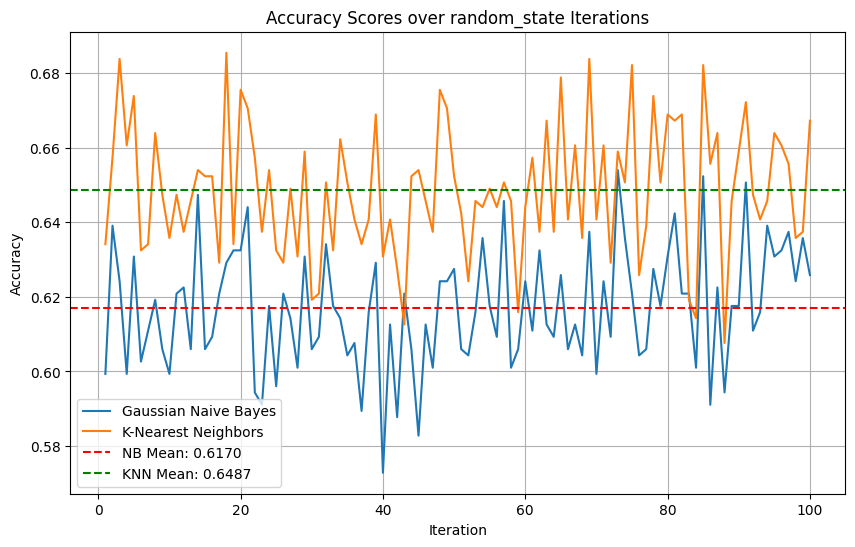

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Define the number of iterations
num_iterations = 100  # You can adjust this number as needed

# Initialize lists to store accuracy scores
nb_scores_baseline = []
knn_scores_baseline = []

# Reset df and perform data preparations:
df_baseline = df_original.copy()

# Drop features by ascending order only or selected ones:
Ascending = False
if Ascending:
  df = droplowcorr(df, 3)
#else:
#  df.drop(columns=['Trihalomethanes'], inplace=True)
#  df.drop(columns=['Turbidity'], inplace=True)
#  df.drop(columns=['Conductivity'], inplace=True)
#  df.drop(columns=['Organic_carbon'], inplace=True)

# NaN Treatment (drop or fill them all):
Dropall = True
if Dropall:
  df_baseline = df_baseline.dropna()
else:
  df['ph'].fillna(7.0, inplace=True)

# Iterate through random states getting different test/train splits
# Perform Ffill and Outlier Removal on the test/train splits
for random_state in range(num_iterations):
    X, y = shuffle(df_baseline.drop(columns=['Potability']).values,
    df_baseline['Potability'].values,
    random_state=random_state
    )
    # Split the data into train and test sets with different random states
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

    # Ffill feature 'Sulfate'
    if not Dropall:
      df , X_train, X_test, y_train, y_test = train_and_forward_fill(X_train, X_test, y_train, y_test)

    # Fix Class Imbalance:
    # ---
    # by Oversampling (SMOTE):
    #df_train, X_train, y_train = Oversampling(X_train, y_train, random_state)
    # by Undersampling (resample):
    #df_train , X_train, y_train = undersample(X_train, y_train, random_state)

    # Remove Outliers:
    # -----
    # by IQR x 1.5:
    #outliers, df_train, X_train, y_train = IQRremoval(X_train, y_train, 1.5)
    # by IsolationForest:
    #outliers, df_train, X_train, y_train = IsolationForestRemoval(X_train, y_train, random_state, 0.1)

    # Scale features (optional, but recommended for Naive Bayes and KNN)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train Gaussian Naive Bayes model
    model_nb = GaussianNB()
    model_nb.fit(X_train_scaled, y_train)
    pred_nb = model_nb.predict(X_test_scaled)
    nb_score = accuracy_score(y_test, pred_nb)
    nb_scores_baseline.append(nb_score)

    # Train KNN model
    model_knn = KNeighborsClassifier(n_neighbors=29)
    model_knn.fit(X_train_scaled, y_train)
    pred_knn = model_knn.predict(X_test_scaled)
    knn_score = accuracy_score(y_test, pred_knn)
    knn_scores_baseline.append(knn_score)

# Calculate mean accuracy with standard deviation for Gaussian Naive Bayes
nb_mean_accuracy_baseline = np.mean(nb_scores_baseline)
nb_std_deviation_baseline = np.std(nb_scores_baseline)

# Calculate mean accuracy with standard deviation for KNN
knn_mean_accuracy_baseline = np.mean(knn_scores_baseline)
knn_std_deviation_baseline = np.std(knn_scores_baseline)

# Print the results
print(f"Mean Accuracy (Baseline Gaussian Naive Bayes): {nb_mean_accuracy:.4f} ± {nb_std_deviation:.4f}")
print(f"Mean Accuracy (Baseline K-Nearest Neighbors): {knn_mean_accuracy:.4f} ± {knn_std_deviation:.4f}")
plot_accuracy_over_iterations(nb_scores_baseline, knn_scores_baseline)


#### Models iterated on data with features and NaN value observations dropped:

Mean Accuracy (Gaussian Naive Bayes): 0.6248 ± 0.0178
Mean Accuracy (K-Nearest Neighbors): 0.7001 ± 0.0158


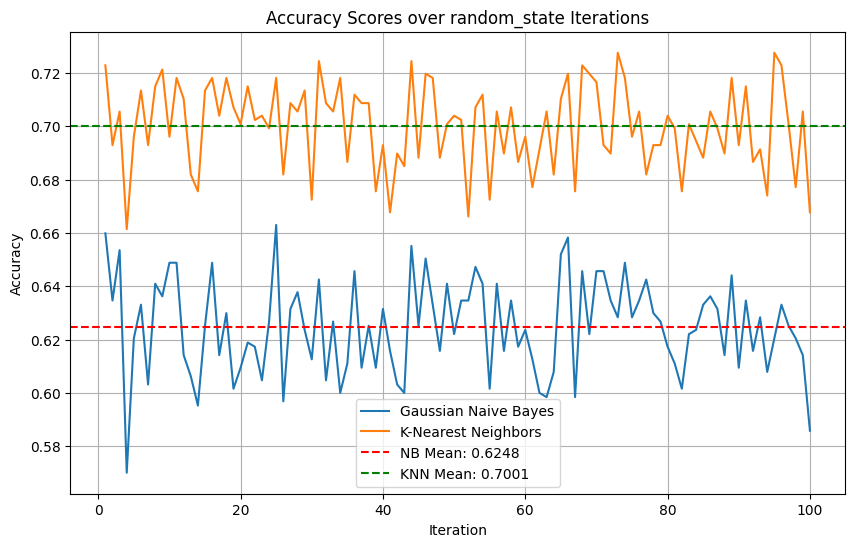

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Define the number of iterations
num_iterations = 100  # You can adjust this number as needed

# Initialize lists to store accuracy scores
nb_scores = []
knn_scores = []

# Reset df and perform data preparations:
df = df_original.copy()

# Drop features by ascending order only or selected ones:
Ascending = False
if Ascending:
  df = droplowcorr(df, 3)
else:
  df.drop(columns=['Trihalomethanes'], inplace=True)
  df.drop(columns=['Turbidity'], inplace=True)
  df.drop(columns=['Conductivity'], inplace=True)
  df.drop(columns=['Organic_carbon'], inplace=True)

# NaN Treatment (drop or fill them all):
Dropall = True
if Dropall:
  df = df.dropna()
else:
  df['ph'].fillna(7.0, inplace=True)

# Iterate through random states getting different test/train splits
# Perform Ffill and Outlier Removal on the test/train splits
for random_state in range(num_iterations):
    X, y = shuffle(df.drop(columns=['Potability']).values,
    df['Potability'].values,
    random_state=random_state
    )
    # Split the data into train and test sets with different random states
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

    # Ffill feature 'Sulfate'
    if not Dropall:
      df , X_train, X_test, y_train, y_test = train_and_forward_fill(X_train, X_test, y_train, y_test)

    # Fix Class Imbalance:
    # ---
    # by Oversampling (SMOTE):
    #df_train, X_train, y_train = Oversampling(X_train, y_train, random_state)
    # by Undersampling (resample):
    #df_train , X_train, y_train = undersample(X_train, y_train, random_state)

    # Remove Outliers:
    # -----
    # by IQR x 1.5:
    #outliers, df_train, X_train, y_train = IQRremoval(X_train, y_train, 1.5)
    # by IsolationForest:
    #outliers, df_train, X_train, y_train = IsolationForestRemoval(X_train, y_train, random_state, 0.1)

    # Scale features (optional, but recommended for Naive Bayes and KNN)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train Gaussian Naive Bayes model
    model_nb = GaussianNB()
    model_nb.fit(X_train_scaled, y_train)
    pred_nb = model_nb.predict(X_test_scaled)
    nb_score = accuracy_score(y_test, pred_nb)
    nb_scores.append(nb_score)

    # Train KNN model
    model_knn = KNeighborsClassifier(n_neighbors=25)
    model_knn.fit(X_train_scaled, y_train)
    pred_knn = model_knn.predict(X_test_scaled)
    knn_score = accuracy_score(y_test, pred_knn)
    knn_scores.append(knn_score)

# Calculate mean accuracy with standard deviation for Gaussian Naive Bayes
nb_mean_accuracy = np.mean(nb_scores)
nb_std_deviation = np.std(nb_scores)

# Calculate mean accuracy with standard deviation for KNN
knn_mean_accuracy = np.mean(knn_scores)
knn_std_deviation = np.std(knn_scores)

# Print the results
print(f"Mean Accuracy (Gaussian Naive Bayes): {nb_mean_accuracy:.4f} ± {nb_std_deviation:.4f}")
print(f"Mean Accuracy (K-Nearest Neighbors): {knn_mean_accuracy:.4f} ± {knn_std_deviation:.4f}")
plot_accuracy_over_iterations(nb_scores, knn_scores)


In [ ]:
features = df.columns[df.columns != 'Potability']
df_train = pd.DataFrame(X_train, columns=features)  # Create DataFrame from X_train
df_train['Potability'] = y_train

In [ ]:
df_train.shape

(1481, 6)

In [ ]:
df_train['Potability'].value_counts()

0    917
1    564
Name: Potability, dtype: int64

In [ ]:
df_test.shape

(635, 6)

In [ ]:
df_test['Potability'].value_counts()

0    390
1    245
Name: Potability, dtype: int64

## Inspect training data with SVD:
## **Protocol 5.) Evaluation - Conclusions:** SVD plotting of the train data was performed to better understand, why kNN performs better than Naive Bayes. Local clusters of the same target label can be identified in the SVD plot, for which kNN performs better in label prediction. The kde plot show a very close distribution between the two target labels, hence the worse predicition accuracy of Naive Bayes. Furthermore, the features are not fully independent from eacht other (as recognized in the pairplots of data statistics) failing the independency assumption of the Naive Bayes model.

### 2 SVD components:

Explained Variance Ratio per Axis: [9.99713928e-01 2.67803445e-04]


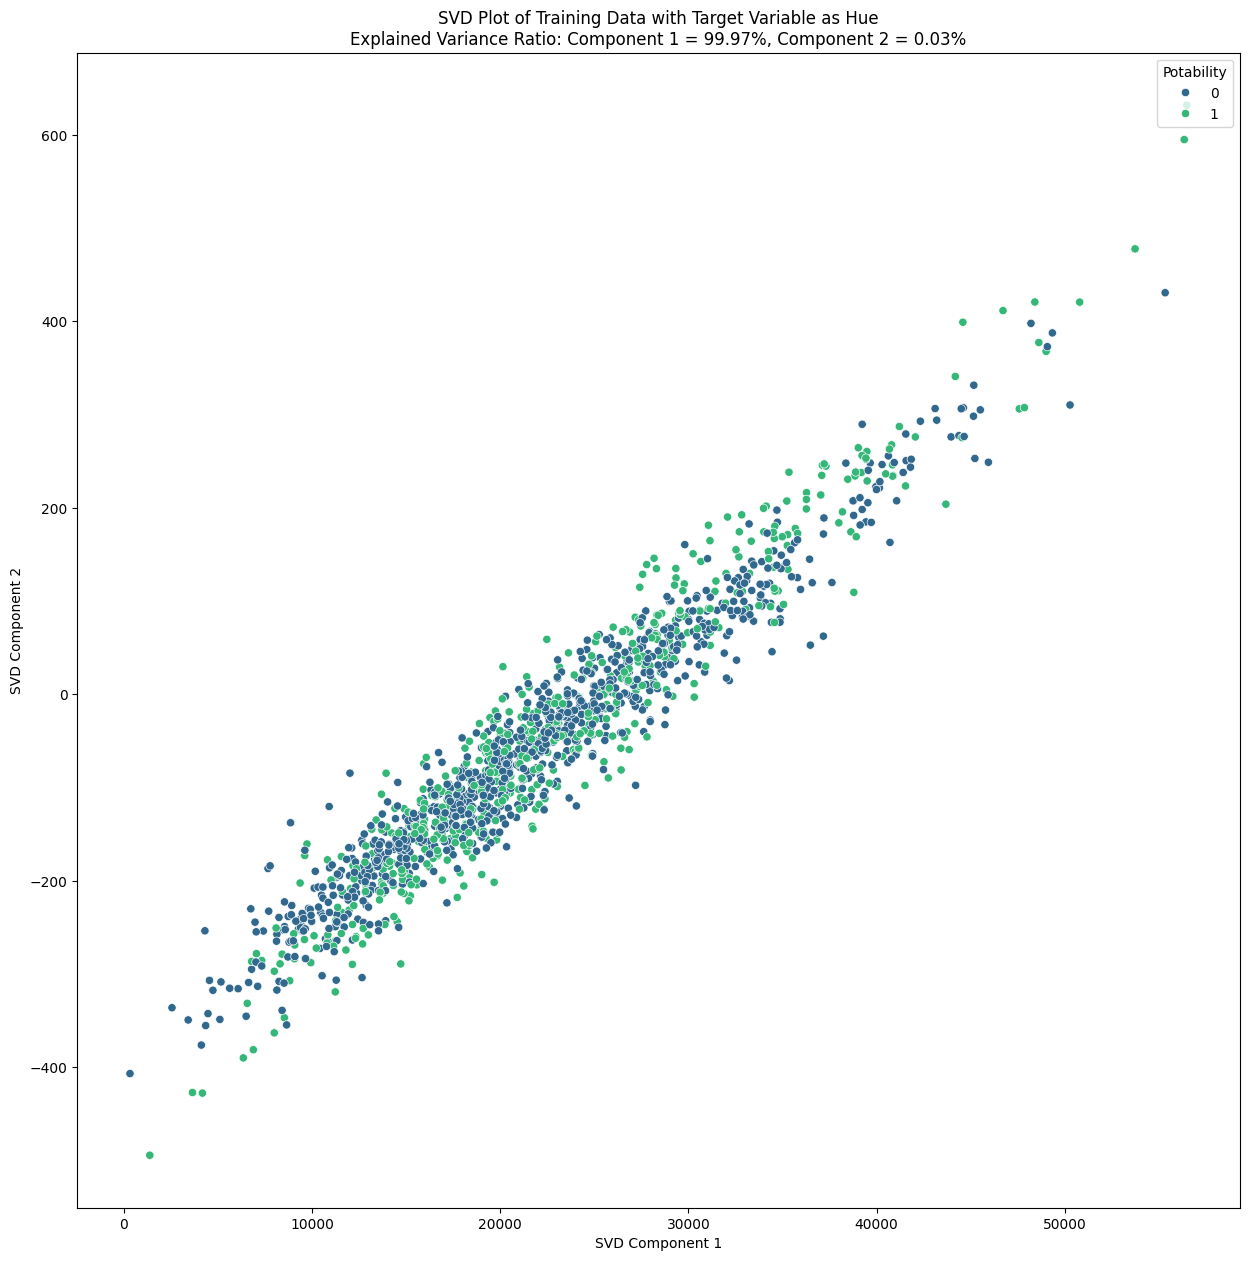

In [ ]:
from sklearn.decomposition import TruncatedSVD
import seaborn as sns

# Assuming df_train is your training DataFrame with features and target variable
# Separate features (X_train) and target variable (y_train)
X_train = df_train.drop(columns=['Potability'])
y_train = df_train['Potability']

# Perform Singular Value Decomposition (SVD)
svd = TruncatedSVD(n_components=2)  # Use only the first two components for 2D plot
X_train_svd = svd.fit_transform(X_train)

# Access the explained variance ratio for each axis
explained_variance_ratio = svd.explained_variance_ratio_
print("Explained Variance Ratio per Axis:", explained_variance_ratio)

# Concatenate SVD-transformed features with the target variable
df_train_svd = pd.DataFrame(X_train_svd, columns=['Component 1', 'Component 2'])
df_train_svd['Potability'] = y_train.values

# Plot the data in 2D using Seaborn
plt.figure(figsize=(15, 15))
sns.scatterplot(data=df_train_svd, x='Component 1', y='Component 2', hue='Potability', palette='viridis')

plt.title('SVD Plot of Training Data with Target Variable as Hue\n'
          f'Explained Variance Ratio: Component 1 = {explained_variance_ratio[0]*100:.2f}%, '
          f'Component 2 = {explained_variance_ratio[1]*100:.2f}%')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.legend(title='Potability', loc='upper right')
plt.show()



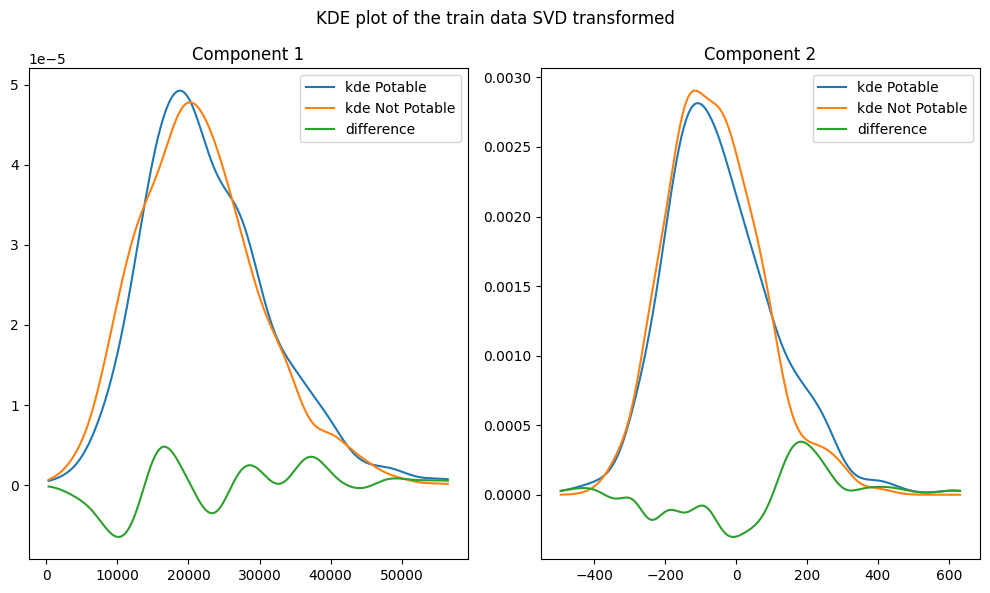

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# Assuming df is your DataFrame and 'Potability' is the target column
target_col = 'Potability'

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
fig.suptitle('KDE plot of the train data SVD transformed')  # Set the title for the entire figure

# Flatten the axes to iterate through them easily
axes = axes.flatten()

# Randomly select 1278 samples of potability 0
not_potable_samples = df_train_svd[df_train_svd[target_col] == 0]#.sample(n=564, random_state=42)

features = list(df_train_svd.columns)[:-1]

for i, col in enumerate(features):
    # Calculate KDE for Potable and Not Potable
    potable = df_train_svd[df_train_svd[target_col] == 1][col]
    not_potable = not_potable_samples[col]

    kde_pot = scipy.stats.gaussian_kde(potable)
    kde_not_pot = scipy.stats.gaussian_kde(not_potable)

    grid = np.linspace(min(min(potable), min(not_potable)), max(max(potable), max(not_potable)), 501)

    # Plot on the current subplot
    axes[i].plot(grid, kde_pot(grid), label="kde Potable")
    axes[i].plot(grid, kde_not_pot(grid), label="kde Not Potable")
    axes[i].plot(grid, kde_pot(grid) - kde_not_pot(grid), label="difference")
    axes[i].set_title(col)

    axes[i].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# **Protocol 5.) Evaluation - Conclusion and additional next steps you would take:**
# The highest mean average accuracies for Naive Bayes (62.48%) and for kNN (70.01%) were found by training them on following data:
# 1.) features were reduced: 'Trihalomethanes', 'Turbidity', 'Conductivity' and 'Organic_carbon' were removed.
# 2.) Observations containing NaN values were removed.
# 3.) The training data contained 1481 observations with 5 measurement features (ph, Sulfate, Hardness, Solids, Chloramines). With Sulfate, Hardness and Chloramines being the most important features for correct classification. The test data contained 635 observations.
# 4.) The class imbalance in the training data of 'Potability' [0,1] was [917, 564] and in the test data [352, 283] after the iterations. (The numbers can varify slightly)

# The prediction accuracies compared to the baseline models have increased for both the Naive Bayes model (+0.78%) and the kNN model (+5.14%).
# We tried out NaN value filling, Outlier removal and class balancing, but they decreased mean average accuracies.
# kNN performed better than Naive Bayes (+7.53% better), because the data seem to form local clusters with the same label (shown in the SVD representation of the training data).
# Other models f.ex. RandomForest could be considered to be trained and evaluated on this data.

Baseline Models
-------------------------
Mean Accuracy (Baseline Gaussian Naive Bayes): 0.6170 ± 0.0159
Mean Accuracy (Baseline K-Nearest Neighbors): 0.6487 ± 0.0174


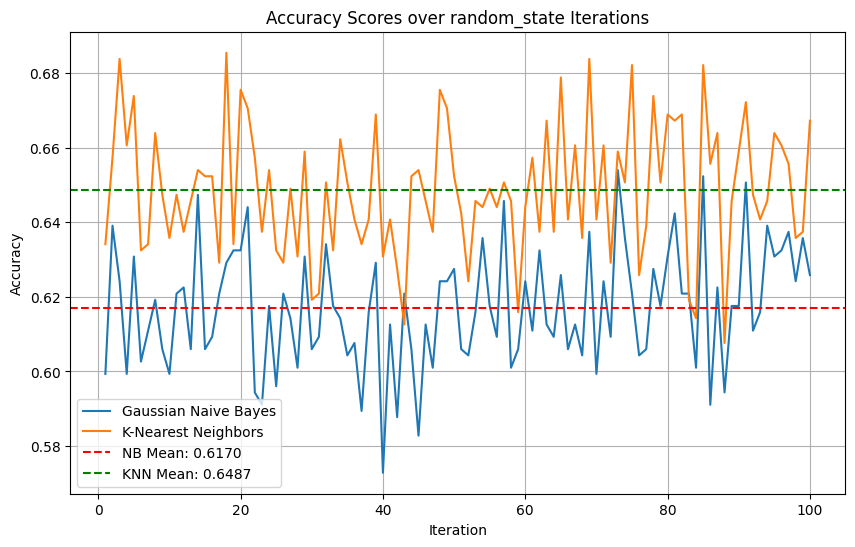

In [ ]:
print('Baseline Models')
print('-------------------------')
print(f"Mean Accuracy (Baseline Gaussian Naive Bayes): {nb_mean_accuracy_baseline:.4f} ± {nb_std_deviation_baseline:.4f}")
print(f"Mean Accuracy (Baseline K-Nearest Neighbors): {knn_mean_accuracy_baseline:.4f} ± {knn_std_deviation_baseline:.4f}")
plot_accuracy_over_iterations(nb_scores_baseline, knn_scores_baseline)

Optimized Models
-------------------------
Mean Accuracy (Gaussian Naive Bayes): 0.6248 ± 0.0178
Mean Accuracy (K-Nearest Neighbors): 0.7001 ± 0.0158


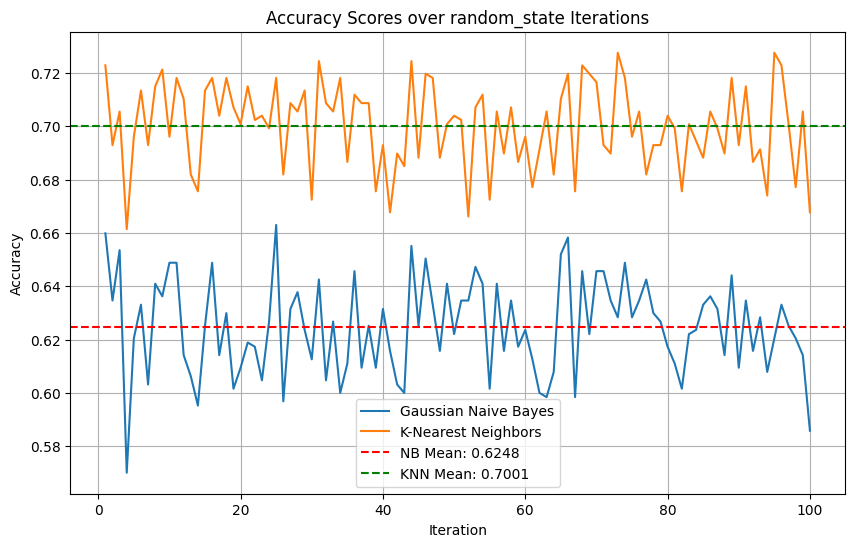

In [ ]:
print('Optimized Models')
print('-------------------------')
print(f"Mean Accuracy (Gaussian Naive Bayes): {nb_mean_accuracy:.4f} ± {nb_std_deviation:.4f}")
print(f"Mean Accuracy (K-Nearest Neighbors): {knn_mean_accuracy:.4f} ± {knn_std_deviation:.4f}")
plot_accuracy_over_iterations(nb_scores, knn_scores)